# MMN 21 - course Information / Data Mining. 
This work was done as part of the "Information / Data Mining" course at the Open University.

The database (subjects from Mexico, Peru, and Colombia can be found at: https://www.kaggle.com/mpwolke/obesity-levels-life-style/data )

Explanations about the data can be found in the article by Fabio Mendoza Palechor at: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub )
 
The project's target:
Predict the degree of obesity of a subject from the set of given characteristics.

## question 1

In [1]:
import pandas as pd
df = pd.read_csv(r"./data/NOT_FOR_EDIT_ObesityDataSet_raw_and_data_sinthetic.csv", header=0, sep=',') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [2]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

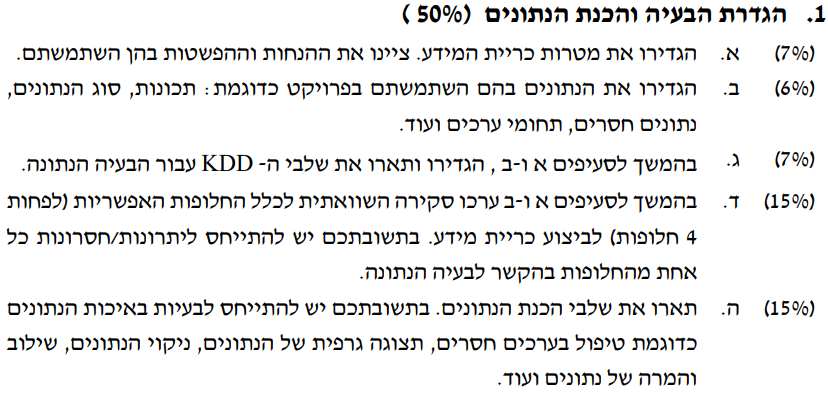

In [3]:
from IPython import display
display.Image("./imagesAndPDF/q1.PNG")

### q 1.A.

The purpose of data mining is to predict the degree of obesity of a subject from the population in the region of Mexico Peru and Colombia using the features from the database given to us.
The feature we want to predict (per record) is the NObeyesdad column (obesity level).
Our database includes 2111 records where each record has seventeen total attributes (including the target for prediction).

In [4]:
df.shape

(2111, 17)

#### The assumptions I used during the project:
1. There is a dependence between the variables given in the database and the level of obesity.
2. According to the article, the data was collected by a reliable source who does not intend to "sabotage" the mining purposes.
3. I tried to assume that the level of obesity cataloged per person is according to the BMI formula as presented in the article but after analyzing the data I discovered that this assumption is incorrect and therefore I will not be able to omit this data from the database.

# q 1.B.
The data obtained (i.e., the raw database) included 2111 records where each record has 17 attributes (excluding the index attribute, which of course does not constitute an influence factor but is unique to each record.)
In accordance with what is stated in the explanatory article on the data, it is possible to divide the attributes (16) that are not the target column into 3 inclusive parent categories.

##### Eating habits :
1. FAVC - Frequent consumption of foods with high caloric value
2. FCVC - Frequency of vegetable consumption
3. NCP - Number of main meals
4. CAEC - Consumption of food between meals
5. CH20 - daily water intake
6. CALC - Alcohol consumption

##### Influencing habits unrelated to eating / drinking:
1. SCC - Monitoring Calorie Consumption
2. FAF - Frequency of exercise
3. TUE - time in technological devices
4. MTRANS - Type of use of transportation
5. SMOKE- SMOKING

##### Physical characteristics of a subject:
1. GENDER - Gender
2. AGE - Age
3. HEIGHT - Height
4. WEIGHT - Weight
5. family_history_with_overweight - An overweight family history

By using the isnull, any and describe functions we can see that there are no "missing values" in the database and get idea about the distribution of the data.


In [5]:
df.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [6]:
df.describe(include='all')

Gender          Age       Height       Weight  \
count    2111  2111.000000  2111.000000  2111.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.312600     1.701677    86.586058   
std       NaN     6.345968     0.093305    26.191172   
min       NaN    14.000000     1.450000    39.000000   
25%       NaN    19.947192     1.630000    65.473343   
50%       NaN    22.777890     1.700499    83.000000   
75%       NaN    26.000000     1.768464   107.430682   
max       NaN    61.000000     1.980000   173.000000   

       family_history_with_overweight  FAVC         FCVC          NCP  \
count                            2111  2111  2111.000000  2111.000000   
unique                              2     2          NaN          NaN   
top                               yes   yes          NaN          NaN   
freq                             1726  1866          NaN          NaN   
mean                              NaN   NaN     2.419043     2.685628   
std                               NaN   NaN     0.533927     0.778039   
min                               NaN   NaN     1.000000     1.000000   
25%                               NaN   NaN     2.000000     2.658738   
50%                               NaN   NaN     2.385502     3.000000   
75%                               NaN   NaN     3.000000     3.000000   
max                               NaN   NaN     3.000000     4.000000   

             CAEC SMOKE         CH2O   SCC          FAF          TUE  \
count        2111  2111  2111.000000  2111  2111.000000  2111.000000   
unique          4     2          NaN     2          NaN          NaN   
top     Sometimes    no          NaN    no          NaN          NaN   
freq         1765  2067          NaN  2015          NaN          NaN   
mean          NaN   NaN     2.008011   NaN     1.010298     0.657866   
std           NaN   NaN     0.612953   NaN     0.850592     0.608927   
min           NaN   NaN     1.000000   NaN     0.000000     0.000000   
25%           NaN   NaN     1.584812   NaN     0.124505     0.000000   
50%           NaN   NaN     2.000000   NaN     1.000000     0.625350   
75%           NaN   NaN     2.477420   NaN     1.666678     1.000000   
max           NaN   NaN     3.000000   NaN     3.000000     2.000000   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351  
mean          NaN                    NaN             NaN  
std           NaN                    NaN             NaN  
min           NaN                    NaN             NaN  
25%           NaN                    NaN             NaN  
50%           NaN                    NaN             NaN  
75%           NaN                    NaN             NaN  
max           NaN                    NaN             NaN

## q 1.c.

### KDD stages:

##### 1.	Defining the goals of mining the information:
    א.	The purpose of mining the information is to predict the degree of obesity of a subject from the population of Mexico, Peru and Colombia using the features from the database given to us.
    
#####  2.	Collect and save the data:
    ב.	Selects the set of data on which the process will be executed.
    ג.	The data was obtained from https://www.kaggle.com/mpwolke/obesity-levels-life-style/dataand the explanatory file for the data in the database was obtained from https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub
    ד.	The file I loaded into python with the help of pandas.
    
##### 3.	Clearing the data:
    ה.	Checks for records with missing values. 
    ו.	Check whether records have unreasonable values
    ז.	Characterization of the values received in A and B and deciding how to manage them (average, leveling, downloading, downloading the record, etc.) 
    ח.	The resulting database had no missing values (hereinafter, Figure 2) or invalid/unusual and extremist values (detailed below).
    
##### 4.	Perform transformations on the data:
    ט.	Change the way the information is saved.
    י.	Change the record values to another shape
    יא.	Creates new properties according to the purpose of mining.
    
#####  5.	Choosing methods for mining information (such as regression, decision trees, etc.):
    יב.	Comparing algorithms to solving the problem (slide 18 as a general guidance for the relevant method of solution.)  
    יג.	Regarding the above problem, it is necessary to examine models for categorization as well as sequential classification
        models because although the groups were given to us in the name of the value, they stand for is continuous.
    
#####  6.	Discrete and classify the data:
    יד.	Examining the possibility of discretization following the mining goals and algorithms that are being
        considered to be conducted (discreet or continuous data, etc.)
    
#####  7.	Run selected data mining methods:
    טו.	Divides the information into training and test according to the size of the given database (1/3, k-fold, bootstrap)
    טז.	Creating models by running the algorithms from Section 4 above with their different variations (Gini/ Entropy, etc.) on
        training
    
#####  8.	Analysis of the results:
    יז.	Examining the performance of the algorithms in their various variations.
    יח.	Exam with a fog matrix. 
    יט.	An examination using evaluation metrics. 
    כ.	Examining the simplicity and accuracy of the algorithms. 
    כא.	Examines the effectiveness of the various models and classifiers using the roc curve.
    כב.	Deciding whether the models examined provide a proper result and conclusions can be drawn with them or we will need to
        return to the data reclamation stage / choosing mining methods, etc.
    
#####  9.	Conclusions:
    כג.	A decision on model with which the classification of a new reading will be as best as possible 
    כד.	In our case the classification of a new reading so that we know how to evaluate the level of obesity of the new reading.


# q 1.D.

In [7]:
from IPython.display import IFrame, display
filepath = "./imagesAndPDF/models comper.pdf"
IFrame(filepath, width=1000, height=600)

## q 1.E.
##### Clearing the data -
###### Check for missing entries:
    With the help of the info command that can be contained on data frames in pandas it is easy to see that there is no missing data in the database. (See above)
###### Check if there are records with exceptional values:
    Using the describe command that can be contained on data frames in pandas, we get a general look at the database and data in it (standard deviation, mean, quarters, etc. (see above)
    Then, using an Inter quartile Range (IQR) scale, we find the abnormal and extreme values in the continuous features collected and graphically represent the IQR data on a uniform scale with the data distribution graph.


In [8]:
from matplotlib import pyplot as plt


def count_b_locks(data,colm,axess):
    ax=axess
    ax.hist(data[colm], bins = "auto",color='g')
    plt.grid(True)
    ax.bar_label(ax.containers[0],label_type='edge', fontsize=20,color= "w",padding=-45,rotation=90,fontweight="bold")
    prop = dict(marker='D',markersize= 20, markeredgecolor='black',markerfacecolor='firebrick')
    ax.boxplot(data[colm],vert=False,widths=50,notch=True, bootstrap=10000, patch_artist=True,
               boxprops=dict(alpha=None, facecolor=(1,0,0,0),linewidth="5"),
                flierprops=dict(marker='D',markersize= 20, markeredgecolor='black',markerfacecolor='firebrick'),
              )
    ax.axvline(data[colm].mean(), color = "k", label = "mean",linestyle = 'dashed',linewidth=4)
    ax.axvline(data[colm].median(), color = "r", label = "median",linestyle = 'dashed',linewidth=4)
    ax.legend(fontsize = 30)
    ax.set_title(f"Distribution of values in {colm}",fontsize=35)
    ax.set_xlabel(colm,fontsize = 30)
    ax.tick_params(labelsize=20, rotation=90)
    
    

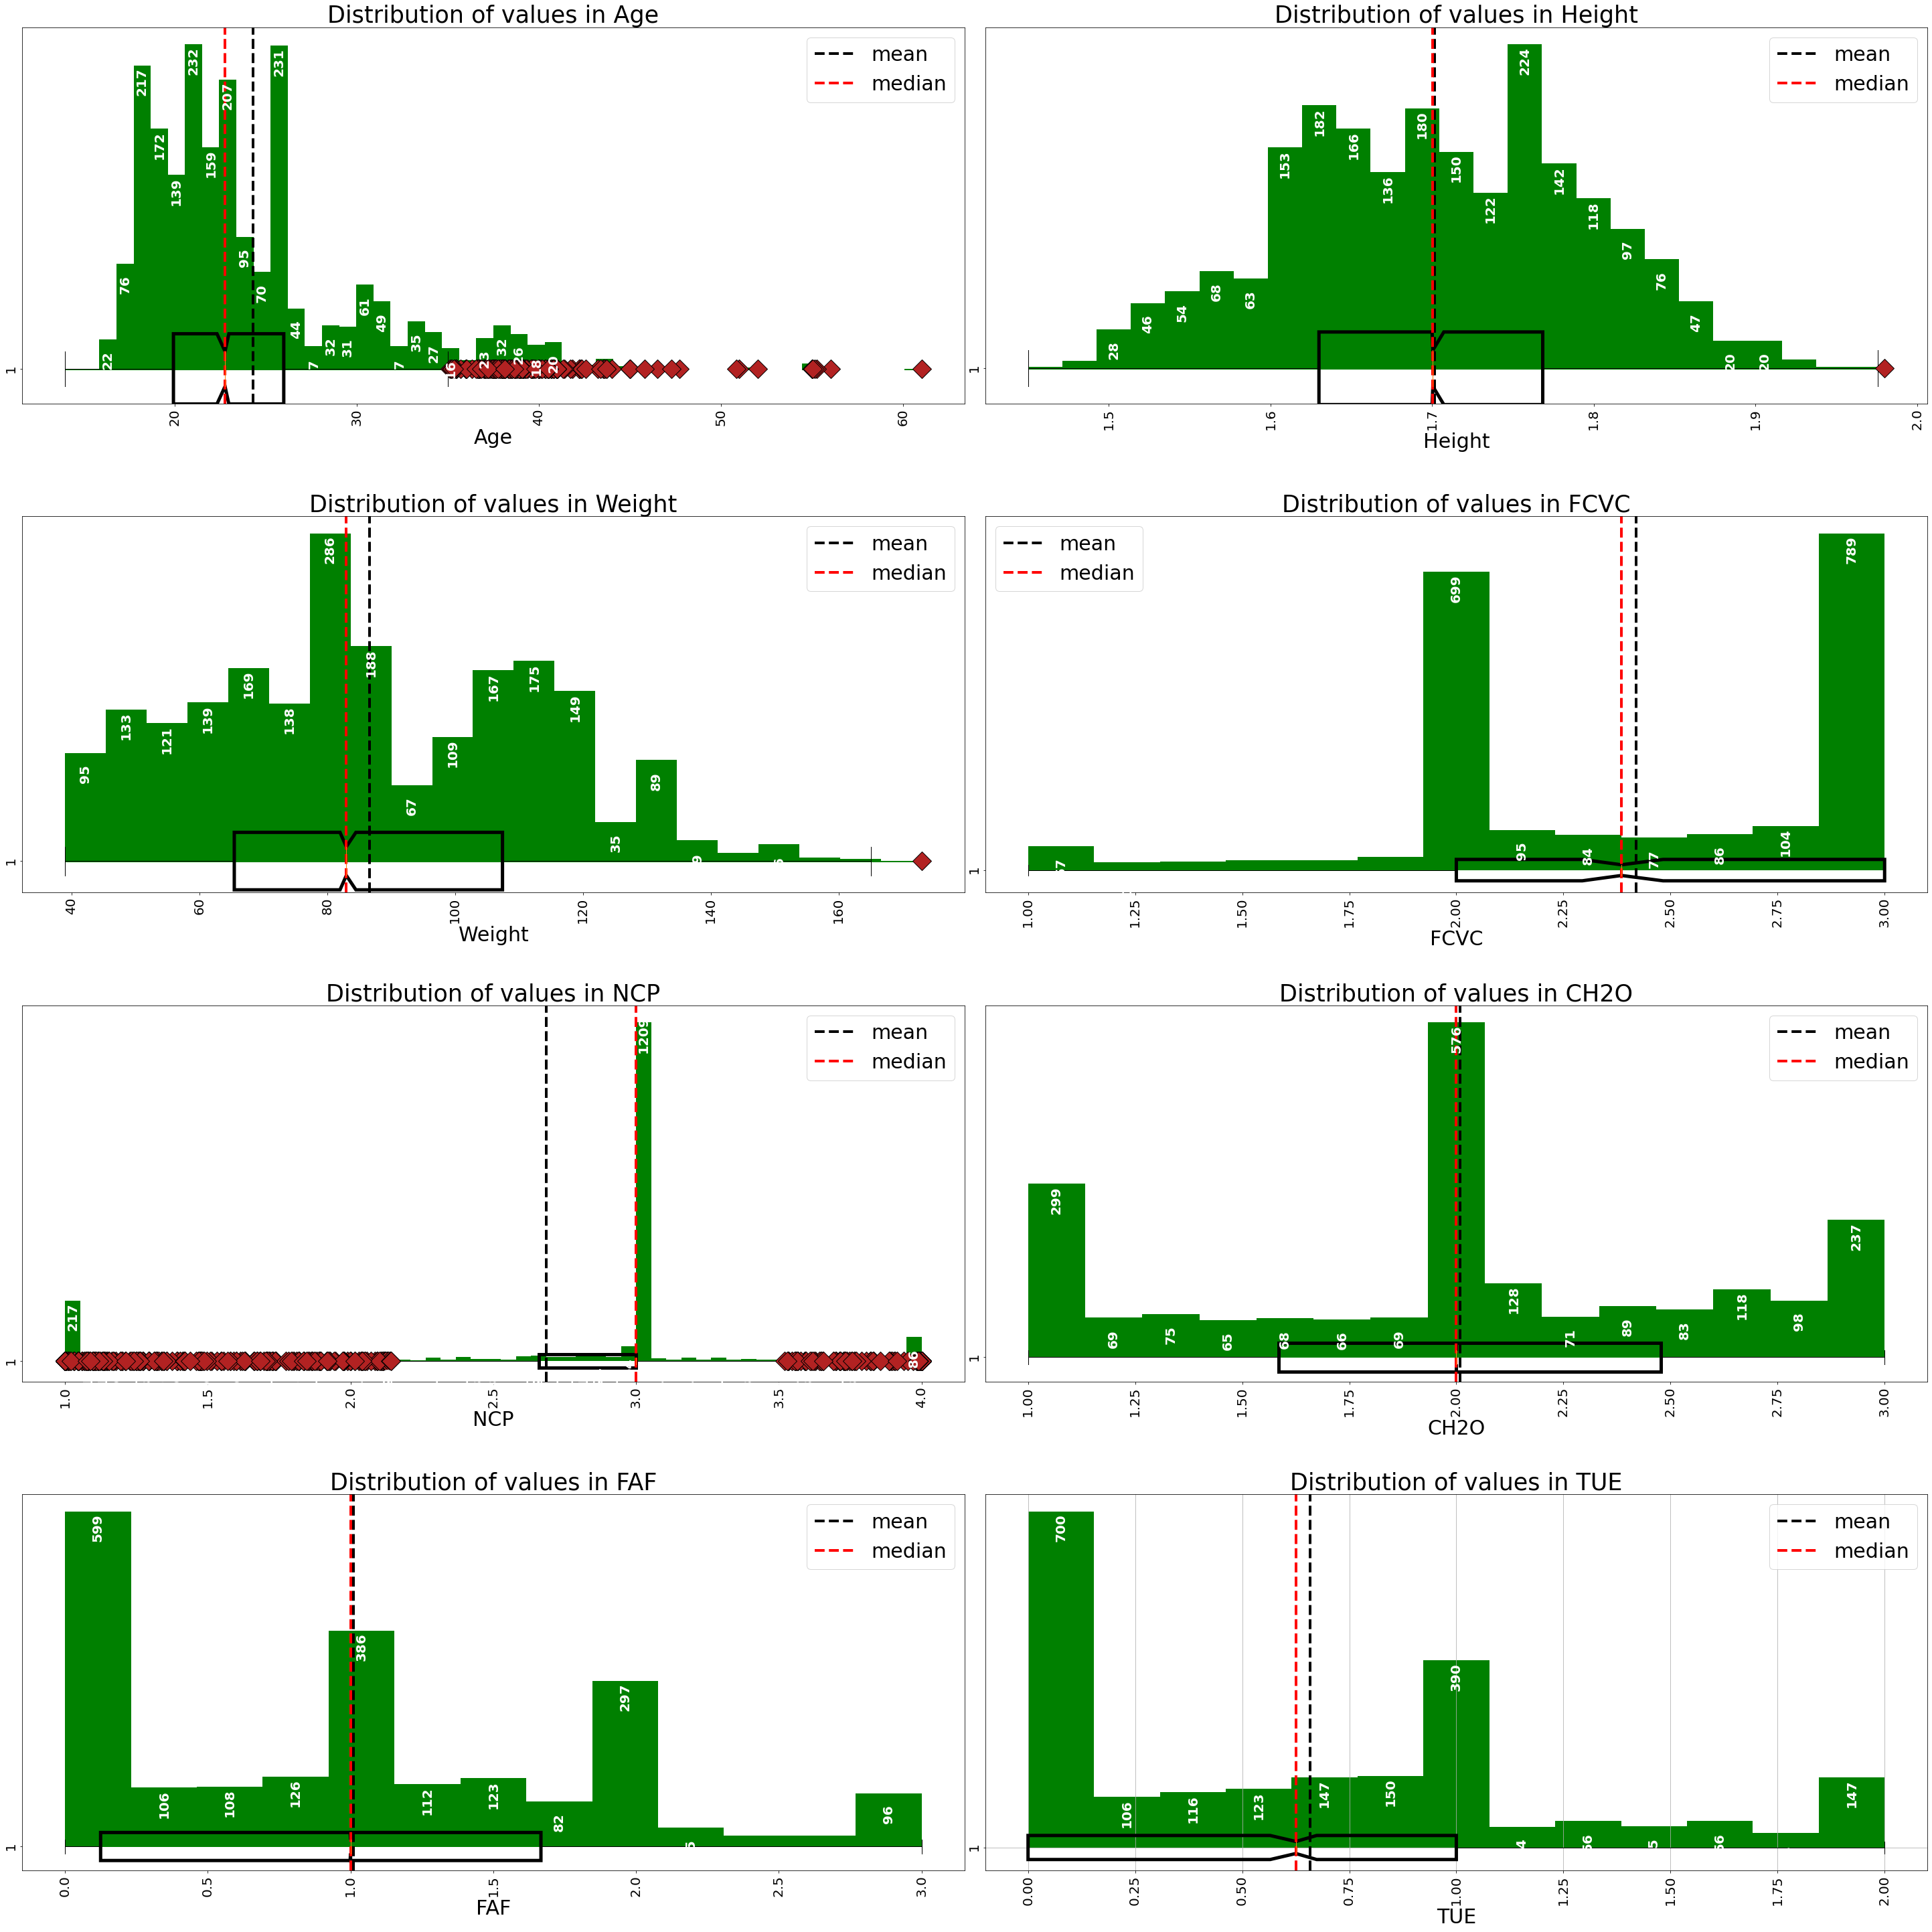

In [9]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (40,40))
idx = 0
axs = axs.flatten()
for k, v in df.items():  
    if df[k].dtype != 'object' and df[k].nunique() != 2 :
        count_b_locks(df,k,axs[idx])
        idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

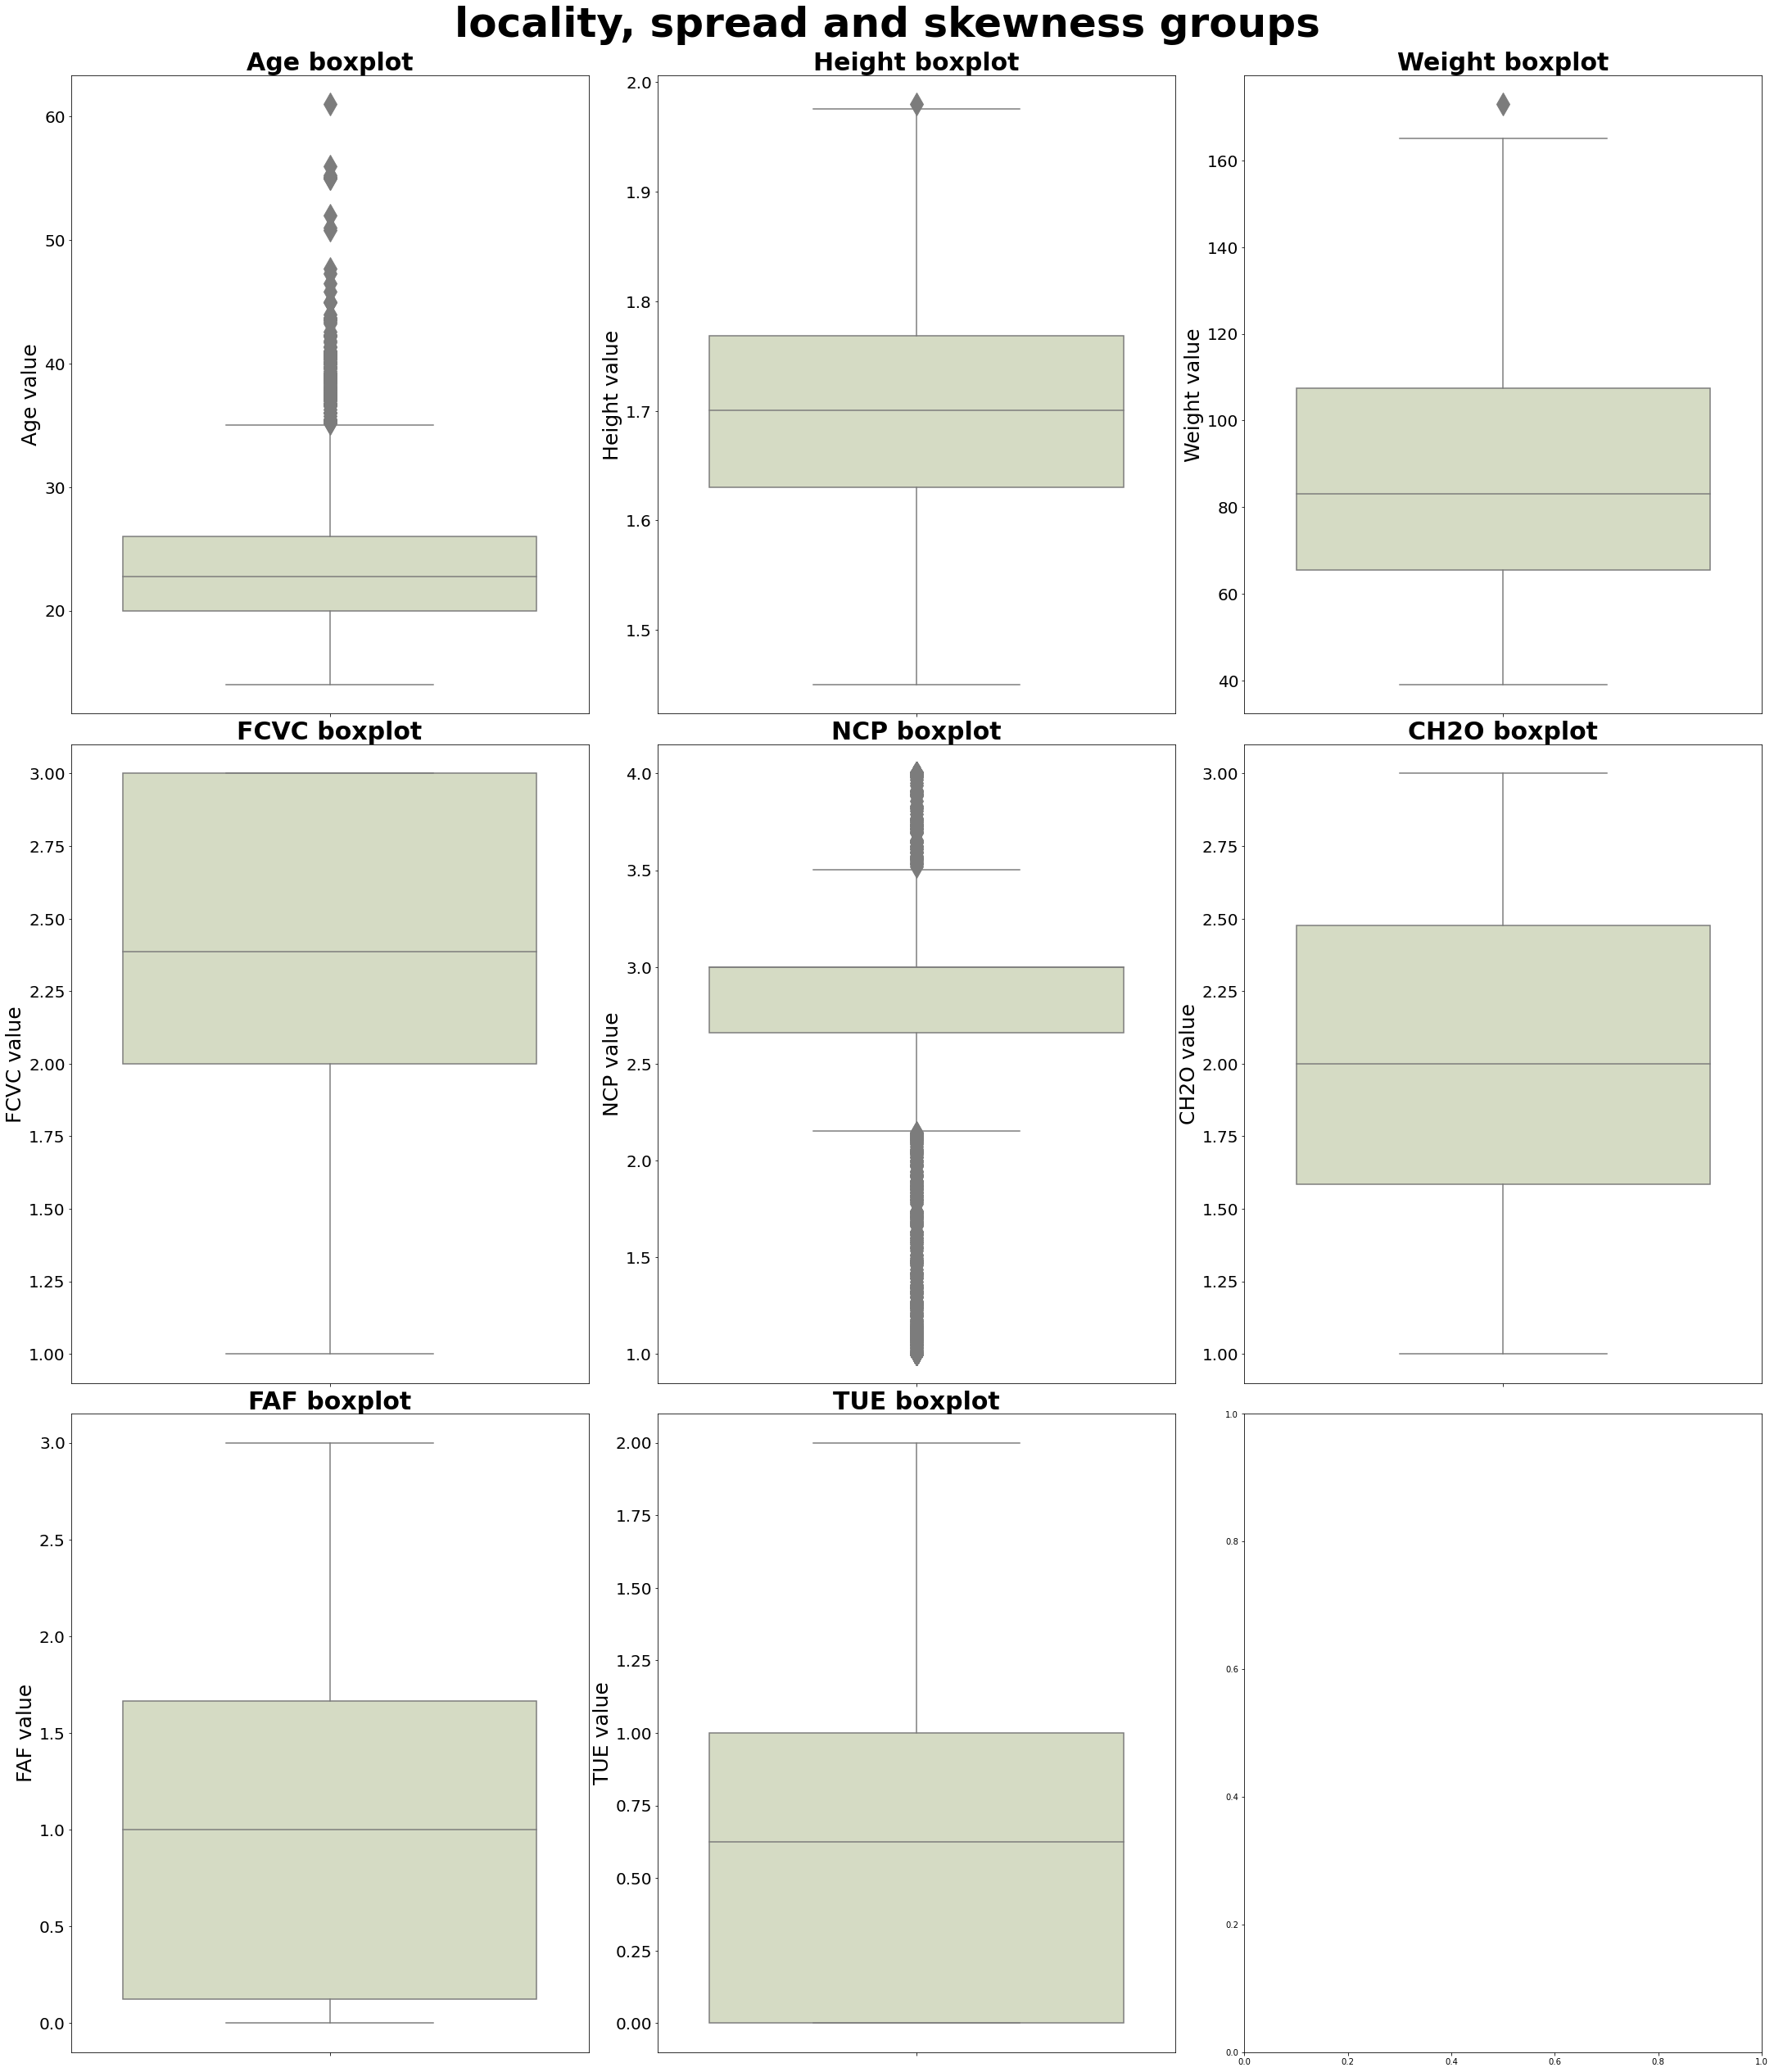

In [10]:
import seaborn as sns

base_plate = sns.cubehelix_palette(start=.5, rot=-.75,)

fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (30,35))
figure_title = "locality, spread and skewness groups" 
plt.suptitle(figure_title, y=1.00,fontsize=50,fontweight="bold")
idx = 0
axs = axs.flatten()
for k, v in df.items():  
    if df[k].dtype != 'object' and df[k].nunique() != 2 :
        b=sns.boxplot(y = k, data = df, ax = axs[idx],palette=base_plate,fliersize=20)
        b.set_ylabel(f"{k} value",fontsize=25)
        b.tick_params(labelsize=20)
        axs[idx].set_title(f"{k} boxplot",fontsize = 30,fontweight="bold")
        idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 0.5)

In [11]:
def countblock(data,colm):
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.hist(data[colm], bins = "auto",color='g',rwidth=0.95)  
    plt.grid(True)
    ax.bar_label(ax.containers[0],label_type='edge', fontsize=20,color= "w",padding=-45,rotation=90,fontweight="bold")
    prop = dict(marker='D',markersize= 20, markeredgecolor='black',markerfacecolor='firebrick')
    ax.boxplot(data[colm],vert=False,widths=50,notch=True, bootstrap=10000, patch_artist=True,
               boxprops=dict(alpha=None, facecolor=(1,0,0,0),linewidth="5"),
                flierprops=dict(marker='D',markersize= 20, markeredgecolor='black',markerfacecolor='firebrick'),
              )
    ax.axvline(data[colm].mean(), color = "k", label = "mean",linestyle = 'dashed',linewidth=4)
    ax.axvline(data[colm].median(), color = "r", label = "median",linestyle = 'dashed',linewidth=4)
    ax.legend(fontsize = 30)
    ax.set_ylabel("Count",fontsize = 30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=90)
    plt.title(f"Distribution of values in {colm}",fontsize=30)
    plt.grid(True)
    plt.show()


### Data distribution for Age:  

We can easily see that there is a bias in the distribution of the subjects according to the percentiles of the subjects and because while the median is 22 the average is 22, the average is 23.97, when you can see that the oldest person is 61 and the youngest is 14 years old. But we will not clean up this data because it makes sense that most of the subjects are "young", but we will remember this for the bias that can come later because of this)


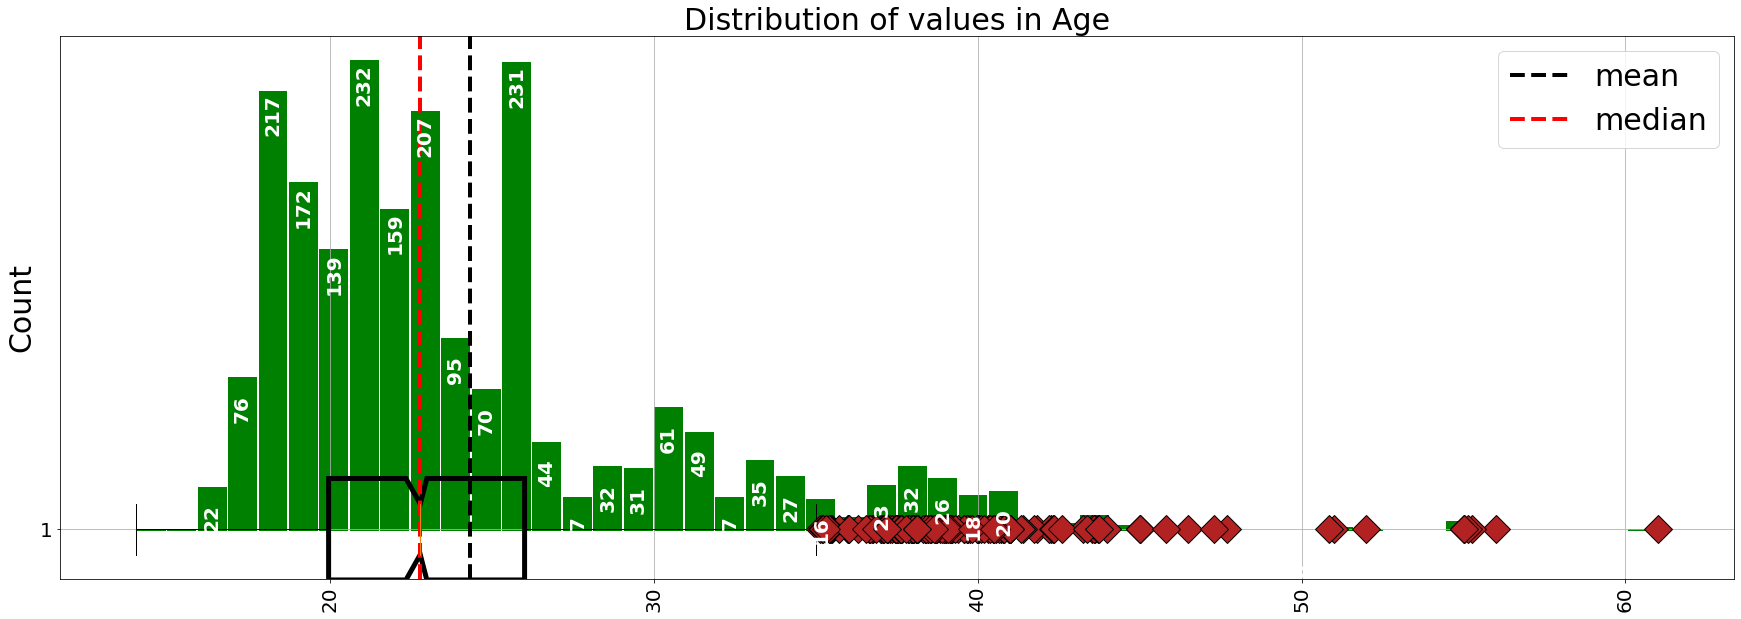

In [12]:
countblock(df,"Age")

### Data distribution for Height:   
According to the standard deviation, it is easy to see that the data in the distribution is good. 

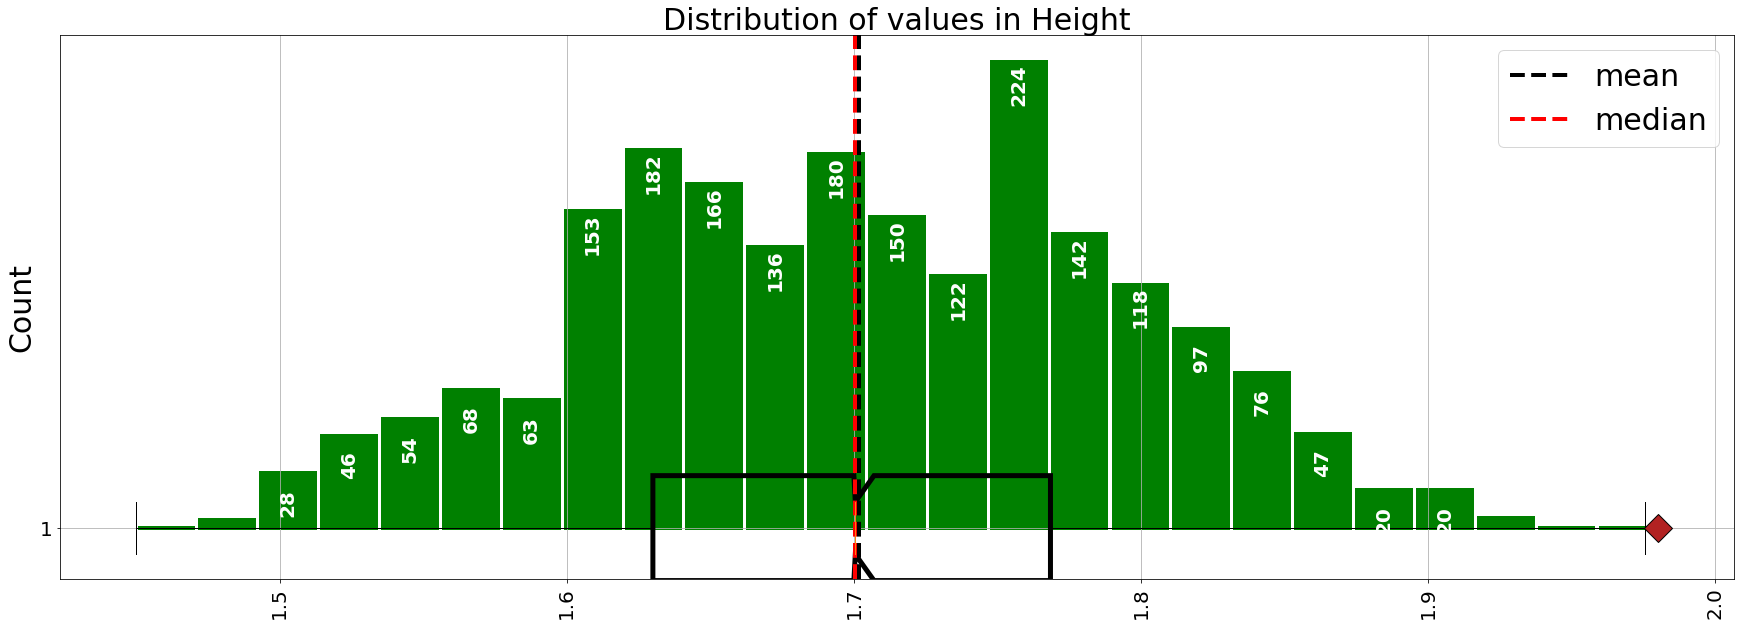

In [13]:
countblock(df,"Height")

### Data distribution for Weight:
You can see that these are values in the logical security and that there is a bi-modal (reasonable) distribution in the data. Since we're going to use decision trees, we're not going to be able to clean up data for that

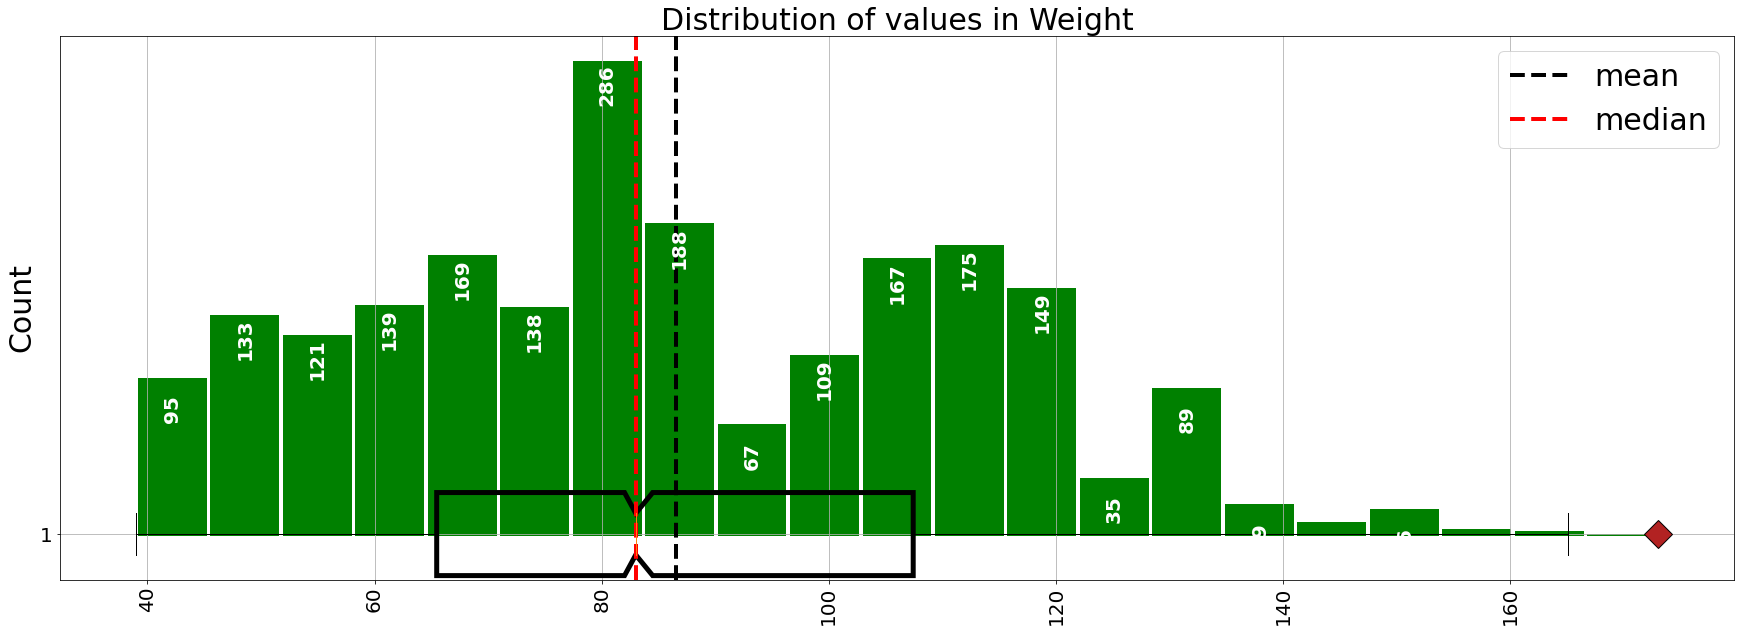

In [14]:
countblock(df,"Weight")

### Data distribution for FCVC (frequency of vegetable consumption):
According to the article attached to the data, the answers were given categorically and not continuously, so the incomplete values are Problems However, due to the great ratio they have in the database, we can assume that it is not possible that this is a human error and apparently the data given to us in the above column has been normalized or some process of reclamation. And that's why we won't take them off.


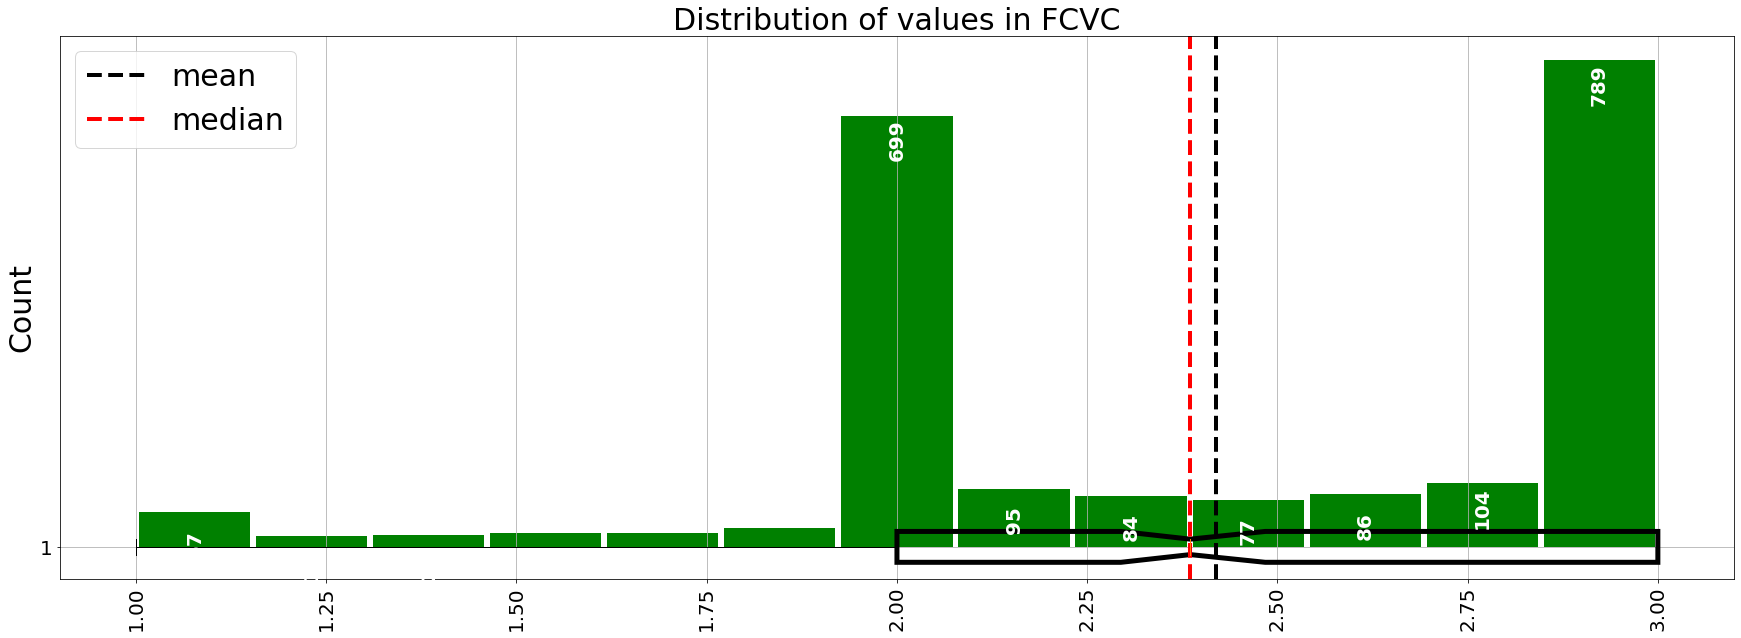

In [15]:
countblock(df,"FCVC")

Regarding the other data given in the database as contiguous values(Figures 5-6) The case is very similar to the FCVC above and therefore because the source of the article is extremely reliable and because apparently it is not a human error and because the amount of information that is forced to download following the removal of these readings is very large, we will assume that the data given to us in the above column has been normalized or the process of preparing preliminary data for our preparation and therefore they are probably already from reclamation Therefore we will not take them off.
It is particularly strange that the application of the question about the frequency of sports is performed, and so there is no detail about how the readings are recorded. For 0 physical activity is much farther conceptual than every 5 days in their distance from each single day but in continuous numbers 0 closer to 1 while 5 is infinitely farther away, being the last frequency that can be entered (without the possibility of 0).


## Testing unnecessary features:
### correlation matrix
To test whether it is possible to give up some of the features of the database, I printed a correlation matrix where the coefficient method is according to Pearson


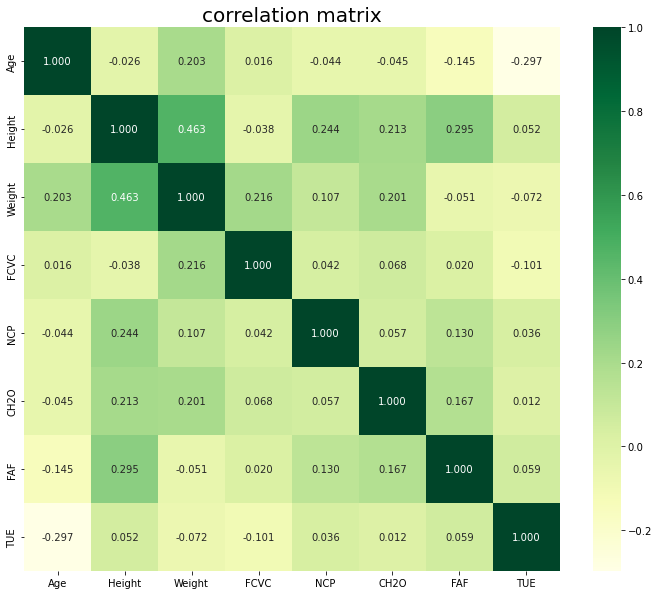

In [16]:
correlation = df.corr(method='pearson')
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True, fmt='.3f',cmap='YlGn')
plt.title('correlation matrix',size=20)
plt.show()

In the correlation matrix it can be seen that except for the strong relationship that exists between weight and height all numerical values do not depend very much on each other.
It is also possible to understand thanks to the correlation matrix the definition of "overweight" of the study, and thus it is inconsistent with the definition of BMI.


### pps(Predictive Power Score) matrix
I also performed a test using the "pps" matrix, which performs in addition to the regular context check on categorical values, and its other advantage is that it checks nonlinear relationships between values in the database. The use was done with the help of python and the repository on GitHub("open source", can be found on: https://github.com/8080labs/ppscore )


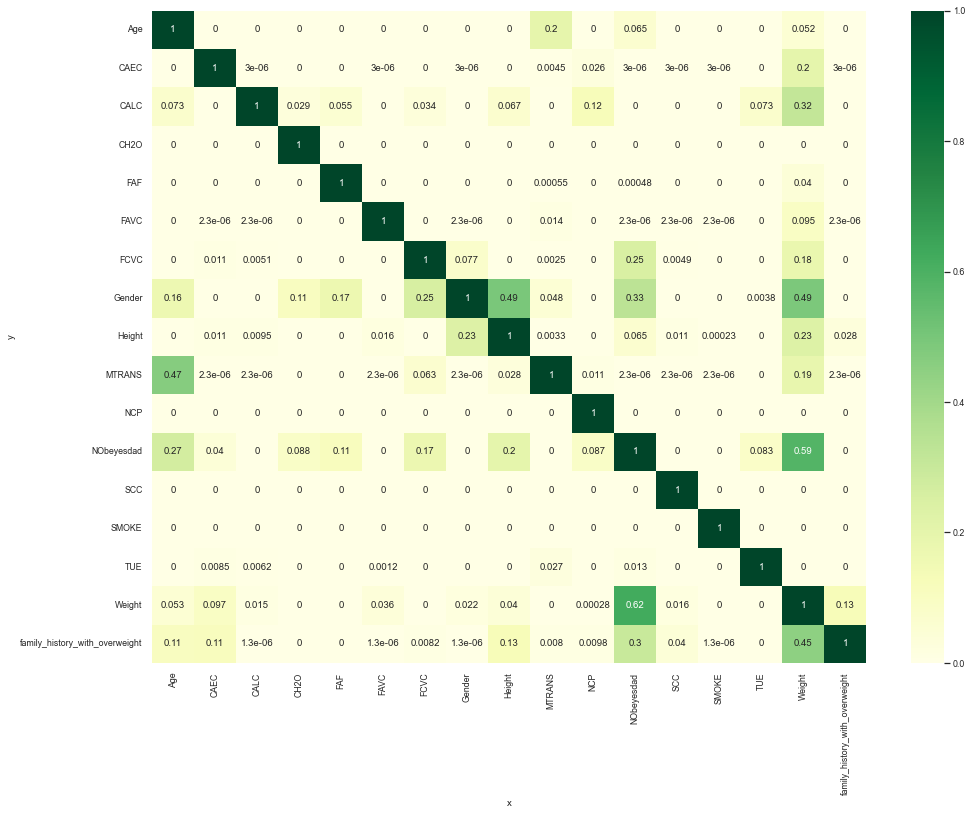

In [17]:
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")

matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore',)

sns.set(font_scale=0.8)
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, annot=True, cmap = "YlGn")
plt.show()

In the "pps" matrix it is interesting to see the strong relationship between the trait's "gender" / "family history of obesity" and "frequency of vegetable consumption" for obesity.
In the context of the frequency of vegetable consumption, the above finding is not unequivocal but is particularly interesting because it appears from the pps matrix that there is no relationship between human weight and the need for vegetables (in this order) but there is a relationship between being classified as overweight (as defined by the study) Being a need for vegetables.

Also, because the amount of data on "adults" is not large it is difficult to say that there is an unequivocal relationship about traits tested in the study but if the information about the different ages was wider, we could probably do a simulation to find the third factor representing the effect of some traits. Reduce the data we analyze. However due to the lack of data we will not use it.


To identify subgroups of information distributions and identify abnormal values, "data cubes" were printed (implementation of the idea of presenting a data cube from Prof. Mark Lest's lectures).

Explanation of "data cubes" (implementation of the idea of presenting a data cube from Prof. Mark Lest's lectures):

Diagonally there are the histograms as a bar graph as well as a density estimate with their smoothing using a Gaussian core that creates a continuous curve (KDE).


The lower triangle has the density distribution with their smoothing using a Gaussian core (kde) depending on 2 variables.


The top triangle has a scatter graph of the data as x-y-dependent depending on the columns and rows.

In the second graph group this is repeated with segregation by obesity levels reported as part of the study.


<Figure size 432x288 with 0 Axes>

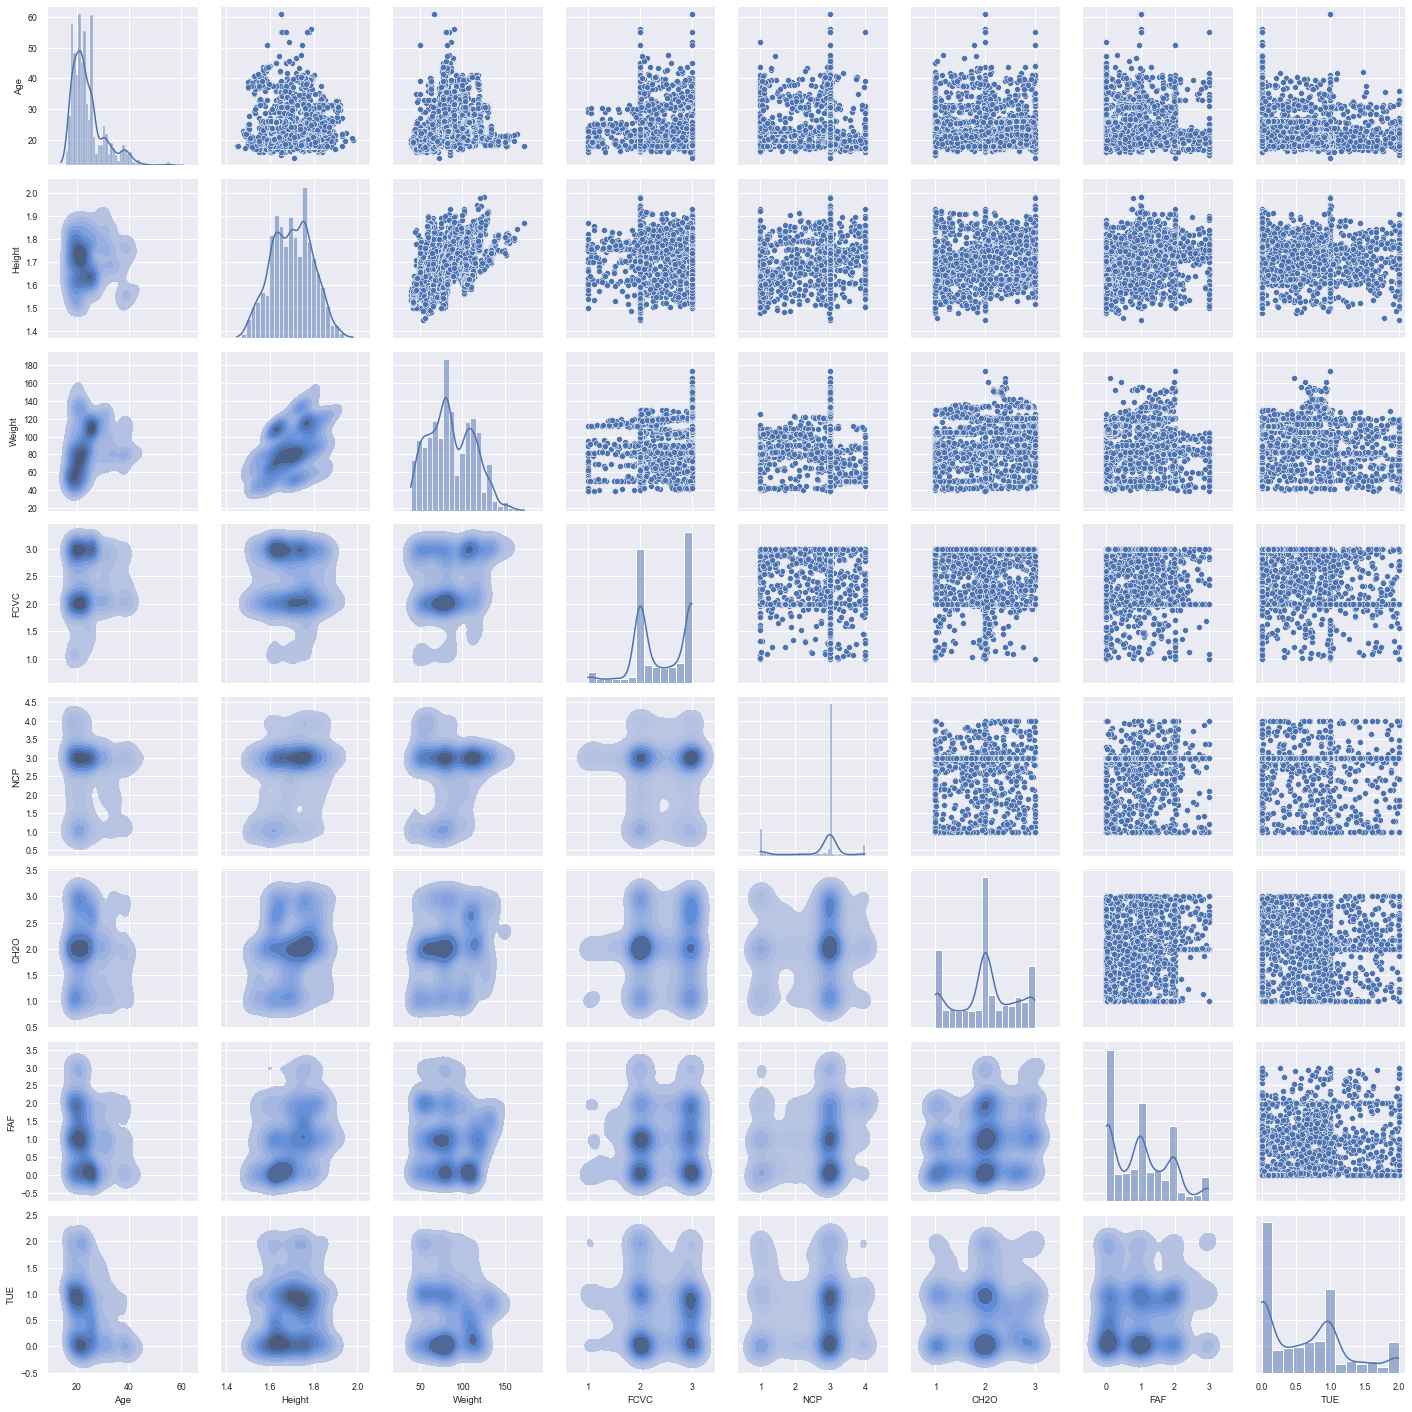

In [18]:
ax = plt.figure()
ax = sns.PairGrid(df, diag_sharey=False,)
ax.map_diag(sns.histplot, kde=True )
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot,fill=True)
ax.savefig('./imagesAndPDF/PairGridWitOuthHue.png', format='png', dpi=1200)
plt.show()

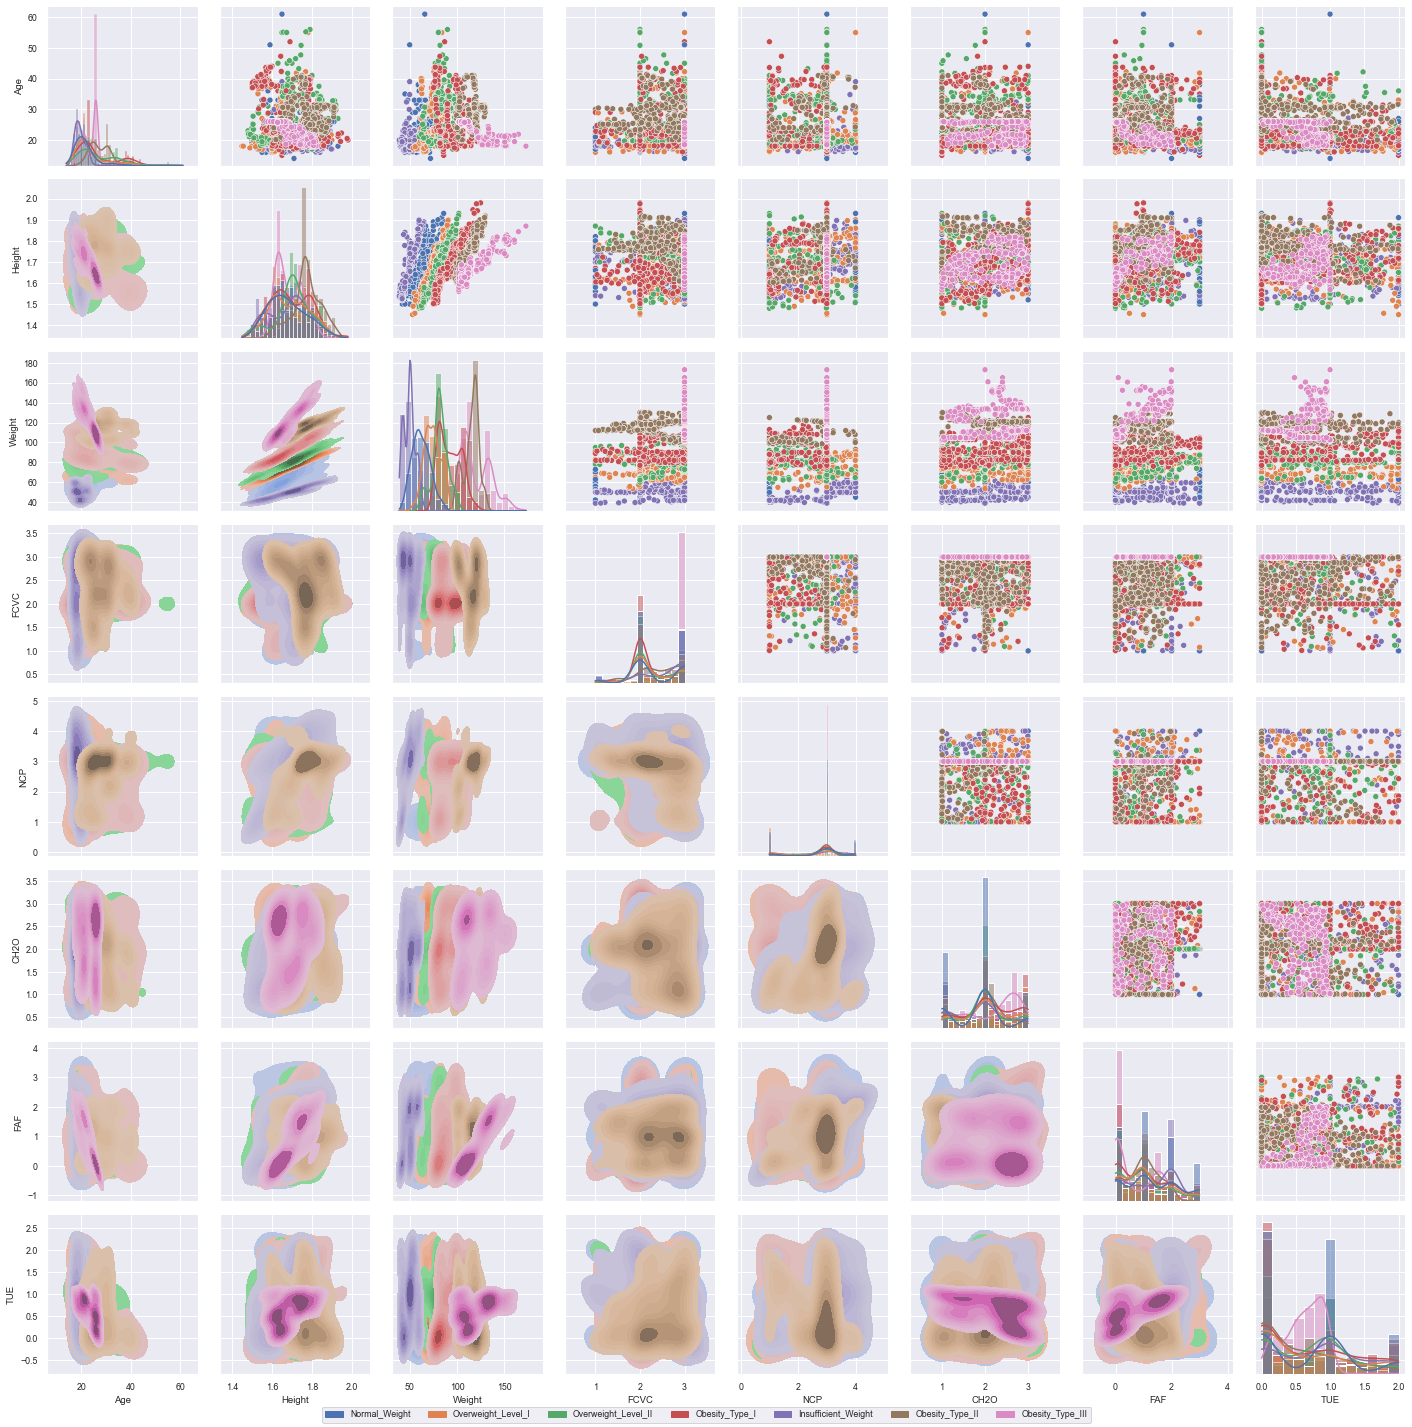

In [19]:
g = sns.PairGrid(df, diag_sharey=False,hue='NObeyesdad',)
g.map_diag(sns.histplot, kde=True )
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot,fill=True)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=7)
g.savefig('./imagesAndPDF/PairGridwithHue.png', format='png', dpi=1200)

The option to waive data with the help of the functions in the feature selection in the sklearn library was also examined.
However due to the above reasons (on the detection of the exceptions) and since in the overall view, the data set is not large so that it will affect the running speed of the algorithms in this task I decided to leave the data.

## Check if there are records with irrational values:

The test for maintaining records with invalid values was performed in parallel with the tests above. When the most convenient way to test was with the command "describe"

No records were found in the database with irrational features other than what I have already detailed above.


## Performing transformations on the data -

### Change the values of the records to another form: 

Below is a graph about dividing the attributes into internal categories before changing the records (but as discrete attributes)

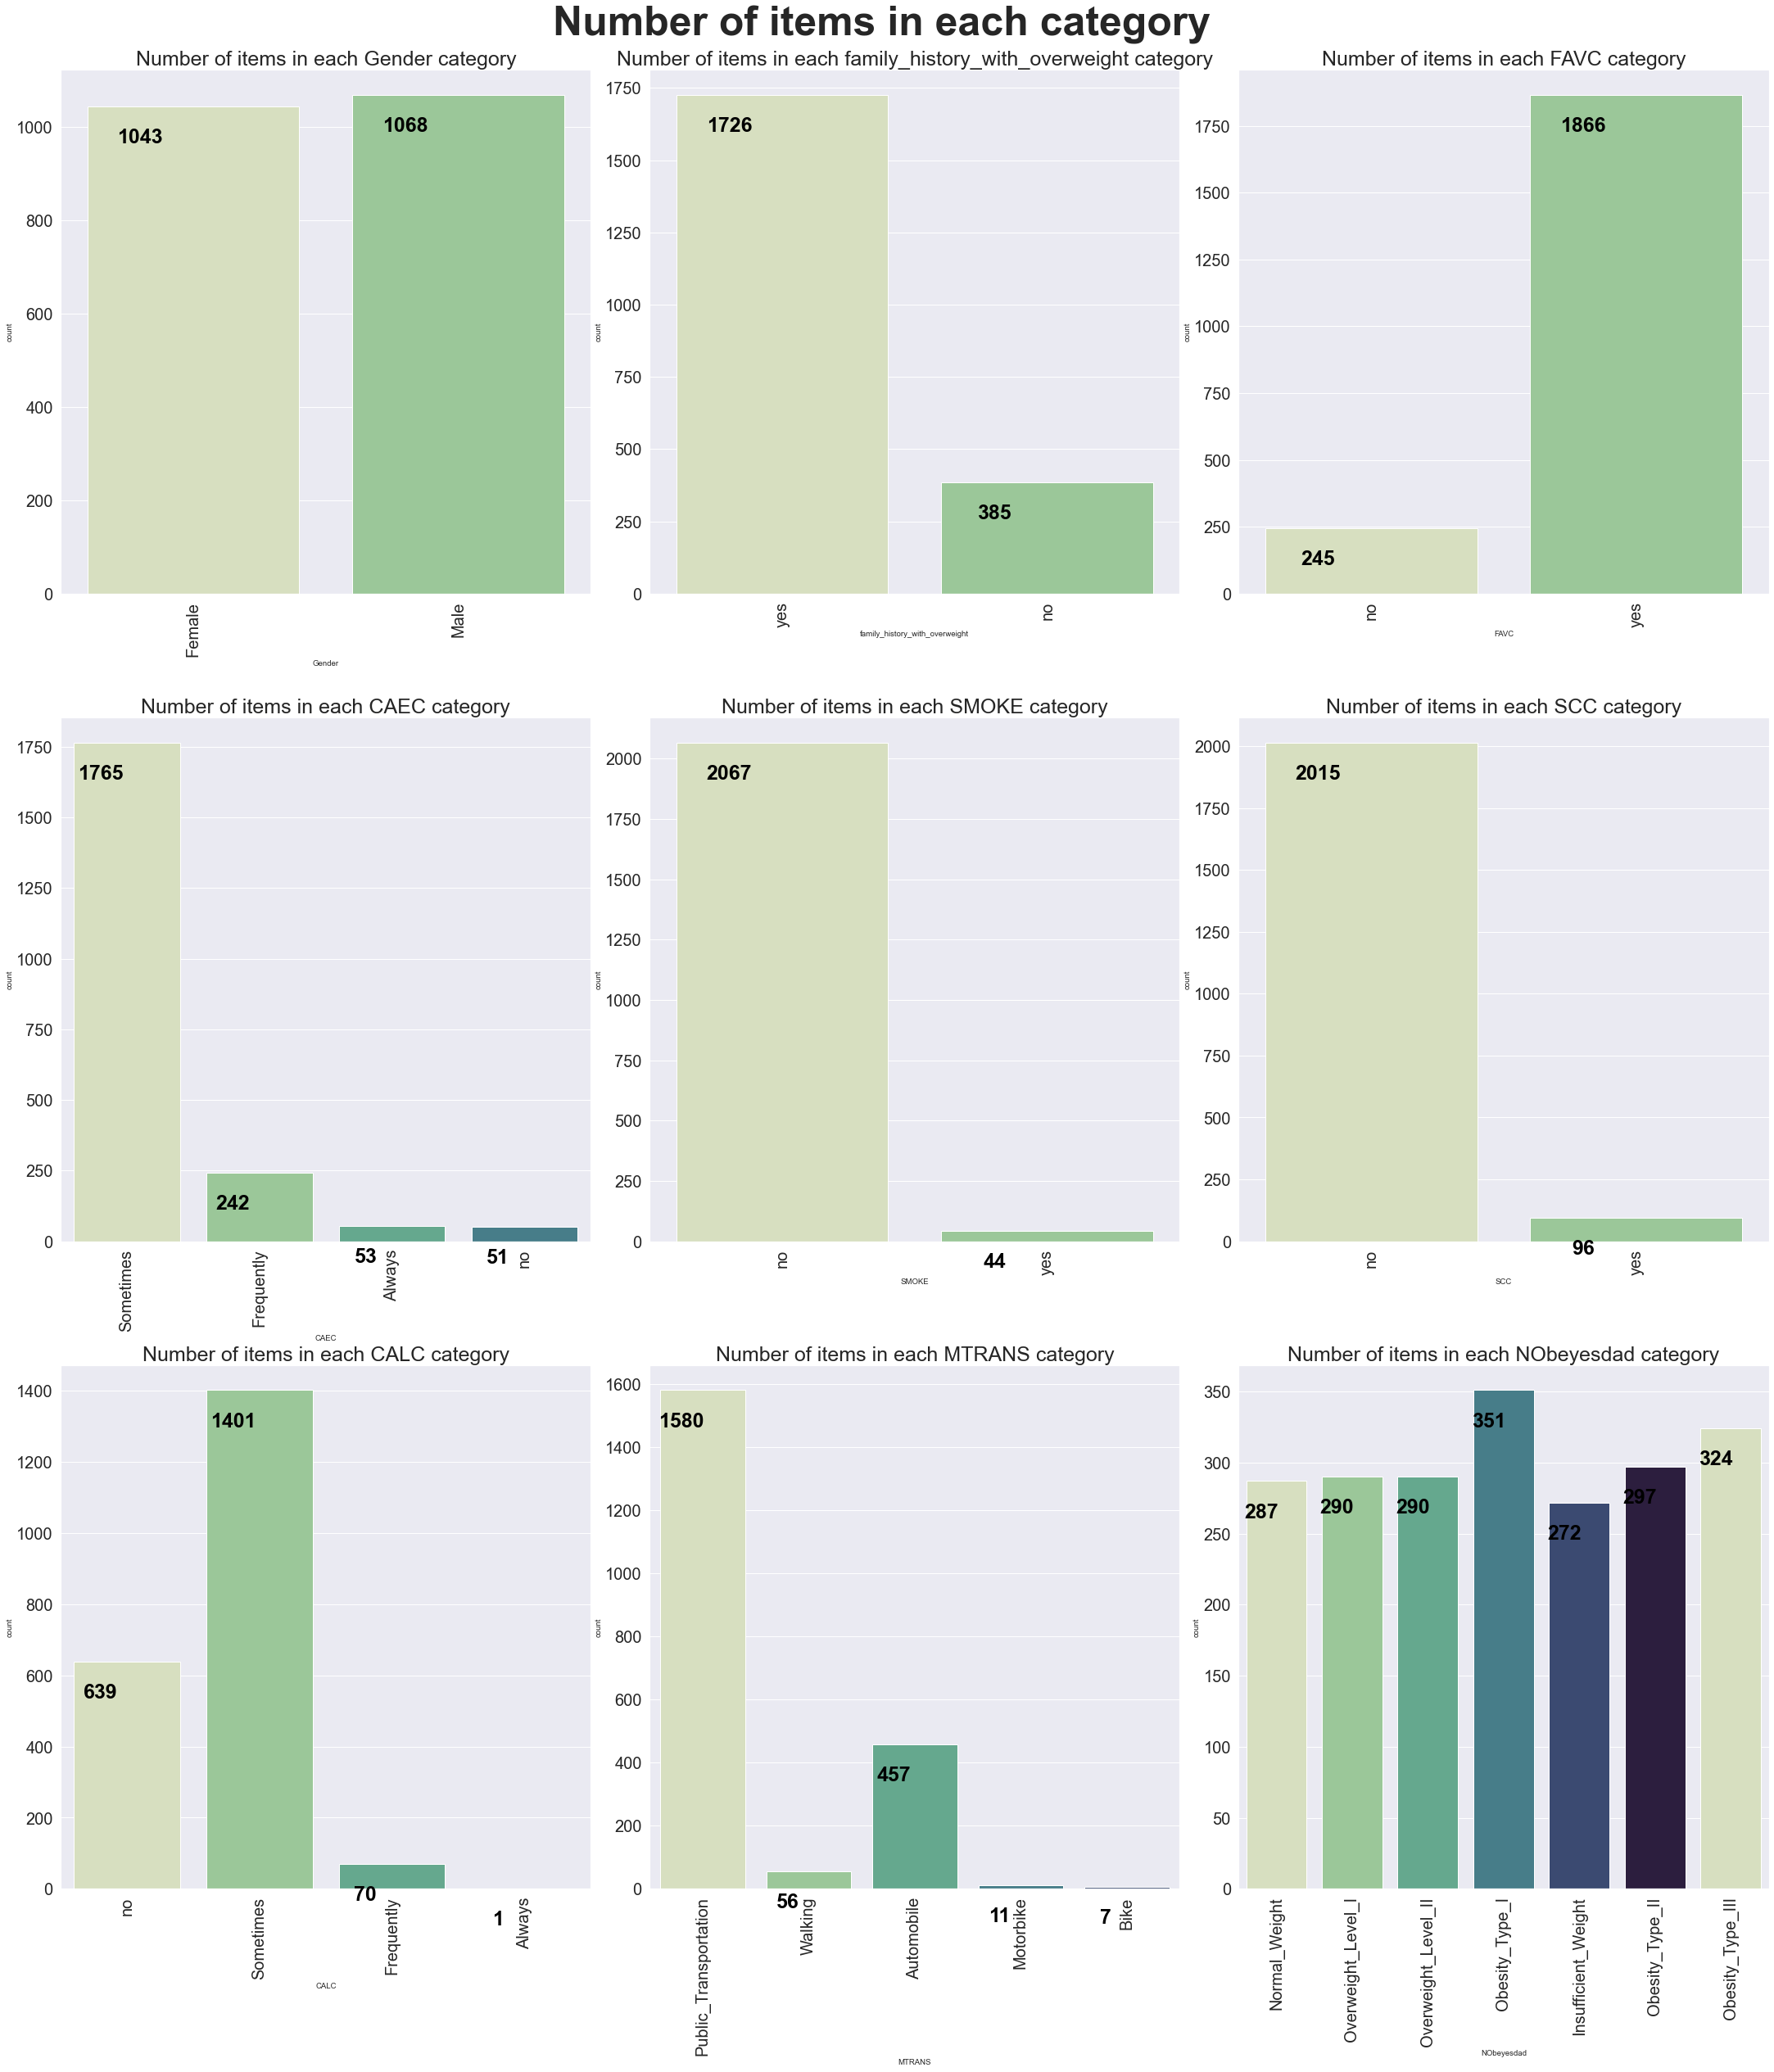

In [20]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (30,35))
figure_title1 = "Number of items in each category "
plt.suptitle(figure_title1, y=1.00,fontsize=50,fontweight="bold")
idx = 0
axs = axs.flatten()
for k, v in df.items():  
        if df[k].dtype == 'object':
            b = sns.countplot(x = k, data = df,ax=axs[idx] , palette = base_plate, order =None,saturation=1)
            for p in b.patches:
                b.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                        ha = "center", va = "top", color = "black", size = 25,fontweight="bold")
            axs[idx].tick_params(axis='x', rotation=90,labelsize=20)
            axs[idx].tick_params(axis='y',labelsize=20)
            #         axs[idx].xticks(rotation=90)
            axs[idx].set_title(f"Number of items in each {k} category",size=25)
            idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 0.5)


##### Following this, for the features:

family_history_with_overweight, FAVC, SMOKE SCC

I converted the way they registered their information so that:

                        Yes: 1
                        No: 0
                        
                        
This is to save space and analysis of the data later.

In [21]:
def change2uniq(dataF,col_name,one_value):
    dataF[col_name] = [1 if x == one_value else 0 for x in dataF[col_name]]  
    
todummyYesNo = [ 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for x in todummyYesNo:
    change2uniq(df,x,'yes')
    
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0  Female  21.0    1.62    64.0                               1     0   2.0   
1  Female  21.0    1.52    56.0                               1     0   3.0   
2    Male  23.0    1.80    77.0                               1     0   2.0   
3    Male  27.0    1.80    87.0                               0     0   3.0   
4    Male  22.0    1.78    89.8                               0     0   2.0   

   NCP       CAEC  SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes      0   2.0    0  0.0  1.0          no   
1  3.0  Sometimes      1   3.0    1  3.0  0.0   Sometimes   
2  3.0  Sometimes      0   2.0    0  2.0  1.0  Frequently   
3  3.0  Sometimes      0   2.0    0  2.0  0.0  Frequently   
4  1.0  Sometimes      0   2.0    0  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

##### For the Gender feature:


Changed the way the data was stored so that:


                        Male: 1
                        Female: 0
                        
                        
This is to save space and analysis of the data later.

In [22]:
df['Gender'] = [1 if x == 'Male' else 0 for x in df['Gender']]  
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP       CAEC  SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes      0   2.0    0  0.0  1.0          no   
1  3.0  Sometimes      1   3.0    1  3.0  0.0   Sometimes   
2  3.0  Sometimes      0   2.0    0  2.0  1.0  Frequently   
3  3.0  Sometimes      0   2.0    0  2.0  0.0  Frequently   
4  1.0  Sometimes      0   2.0    0  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

##### In the MTRANS feature
I have transformed so that the values:

Walking, Motorbike, Bike and Automobile will be registered as one class because the number of registrations that these values have is zero in relation to Public_Transportation and leaving them as a category can create overfitting.

Henceforth the MTRANS attribute values will be represented so that:


                        Public_Transportation: 1
                        walking, Motorbike, Bike: 0


In [23]:
df['MTRANS'] = [1 if x == 'Public_Transportation' else 0 for x in df['MTRANS']]
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP       CAEC  SMOKE  CH2O  SCC  FAF  TUE        CALC  MTRANS  \
0  3.0  Sometimes      0   2.0    0  0.0  1.0          no       1   
1  3.0  Sometimes      1   3.0    1  3.0  0.0   Sometimes       1   
2  3.0  Sometimes      0   2.0    0  2.0  1.0  Frequently       1   
3  3.0  Sometimes      0   2.0    0  2.0  0.0  Frequently       0   
4  1.0  Sometimes      0   2.0    0  0.0  0.0   Sometimes       1   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

##### In the CALC attribute

I have transformed so that the value "Always" with "Frequently" because the value "Always" has only one mention and leaving it as a category can create overfitting (I did not merge with "No" because they stand for ordered categorical values so despite the distribution, we will not discretize them).


In [24]:


df = df.replace({'CALC':{'Always':1.0 ,'Frequently':1.0,'Sometimes':0.5,'no':0.0},
                   'CAEC':{'Always':0.75 ,'Frequently':0.5,'Sometimes':0.25,'no':0.0}
                  })
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0  3.0  0.25      0   2.0    0  0.0  1.0   0.0       1        Normal_Weight  
1  3.0  0.25      1   3.0    1  3.0  0.0   0.5       1        Normal_Weight  
2  3.0  0.25      0   2.0    0  2.0  1.0   1.0       1        Normal_Weight  
3  3.0  0.25      0   2.0    0  2.0  0.0   1.0       0   Overweight_Level_I  
4  1.0  0.25      0   2.0    0  0.0  0.0   0.5       1  Overweight_Level_II

##### In the Age feature
I have transformed so that the value is rounded to the nearest whole value (using numpy around)

In [25]:
import numpy as np

df["Age"] = np.around(df["Age"])
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0  3.0  0.25      0   2.0    0  0.0  1.0   0.0       1        Normal_Weight  
1  3.0  0.25      1   3.0    1  3.0  0.0   0.5       1        Normal_Weight  
2  3.0  0.25      0   2.0    0  2.0  1.0   1.0       1        Normal_Weight  
3  3.0  0.25      0   2.0    0  2.0  0.0   1.0       0   Overweight_Level_I  
4  1.0  0.25      0   2.0    0  0.0  0.0   0.5       1  Overweight_Level_II

##### In the Weight and Height feature:
I transformed so that the value is rounded to a value with a 2-digit accuracy after the dot (using numpy around)

In [26]:
df['Weight'] = np.around(df['Weight'],decimals=2)
df['Height'] = np.around(df['Height'],decimals=2)


df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0  3.0  0.25      0   2.0    0  0.0  1.0   0.0       1        Normal_Weight  
1  3.0  0.25      1   3.0    1  3.0  0.0   0.5       1        Normal_Weight  
2  3.0  0.25      0   2.0    0  2.0  1.0   1.0       1        Normal_Weight  
3  3.0  0.25      0   2.0    0  2.0  0.0   1.0       0   Overweight_Level_I  
4  1.0  0.25      0   2.0    0  0.0  0.0   0.5       1  Overweight_Level_II

The reason for not discretizing the traits age, height, weight, etc. is the findings observed using the pps matrix which shows that there is a difference between the language of each of the traits on the reading of an intermediate value that can affect the value for its prediction (non-linear relationship)


Therefore, the minimum desertization was rounding the data (+ -0.5 per value) and leaving them in their original form.


#### Change the way information is stored.

In order to properly classify the nominal (categorical) values ​​we have in the database, I converted these categorical attributes to binary attributes (which will be represented 0 when no attribute exists and 1 when the attribute exists.)

I converted all the attributes (without the classification) to a value that is decimal for optimization of the algorithms and prevention of bias of the algorithms following different ranges of data.

In [27]:
todummy_list = []
todummy_list2 = []
for col_name in df.columns:
    if len(df[col_name].unique()) == 2 :
        todummy_list2.append(col_name)
    elif df[col_name].dtypes == 'object' and col_name != 'NObeyesdad':
        todummy_list.append(col_name)

# Function to dummy all the categorical variables used for modeling
def dummy_df(dfd, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(dfd[x], prefix=x, dummy_na=False)
        dfd = dfd.drop(x, 1)
        dfd = pd.concat([dfd, dummies], axis=1)
    return dfd



df = dummy_df(df, todummy_list)
df.head()

labels = df["NObeyesdad"]
features = df.drop("NObeyesdad", axis = 1)

features = features.round(decimals = 2)

df = pd.concat([labels, features], axis=1)
df.head()

NObeyesdad  Gender   Age  Height  Weight  \
0        Normal_Weight       0  21.0    1.62    64.0   
1        Normal_Weight       0  21.0    1.52    56.0   
2        Normal_Weight       1  23.0    1.80    77.0   
3   Overweight_Level_I       1  27.0    1.80    87.0   
4  Overweight_Level_II       1  22.0    1.78    89.8   

   family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  \
0                               1     0   2.0  3.0  0.25      0   2.0    0   
1                               1     0   3.0  3.0  0.25      1   3.0    1   
2                               1     0   2.0  3.0  0.25      0   2.0    0   
3                               0     0   3.0  3.0  0.25      0   2.0    0   
4                               0     0   2.0  1.0  0.25      0   2.0    0   

   FAF  TUE  CALC  MTRANS  
0  0.0  1.0   0.0       1  
1  3.0  0.0   0.5       1  
2  2.0  1.0   1.0       1  
3  2.0  0.0   1.0       0  
4  0.0  0.0   0.5       1

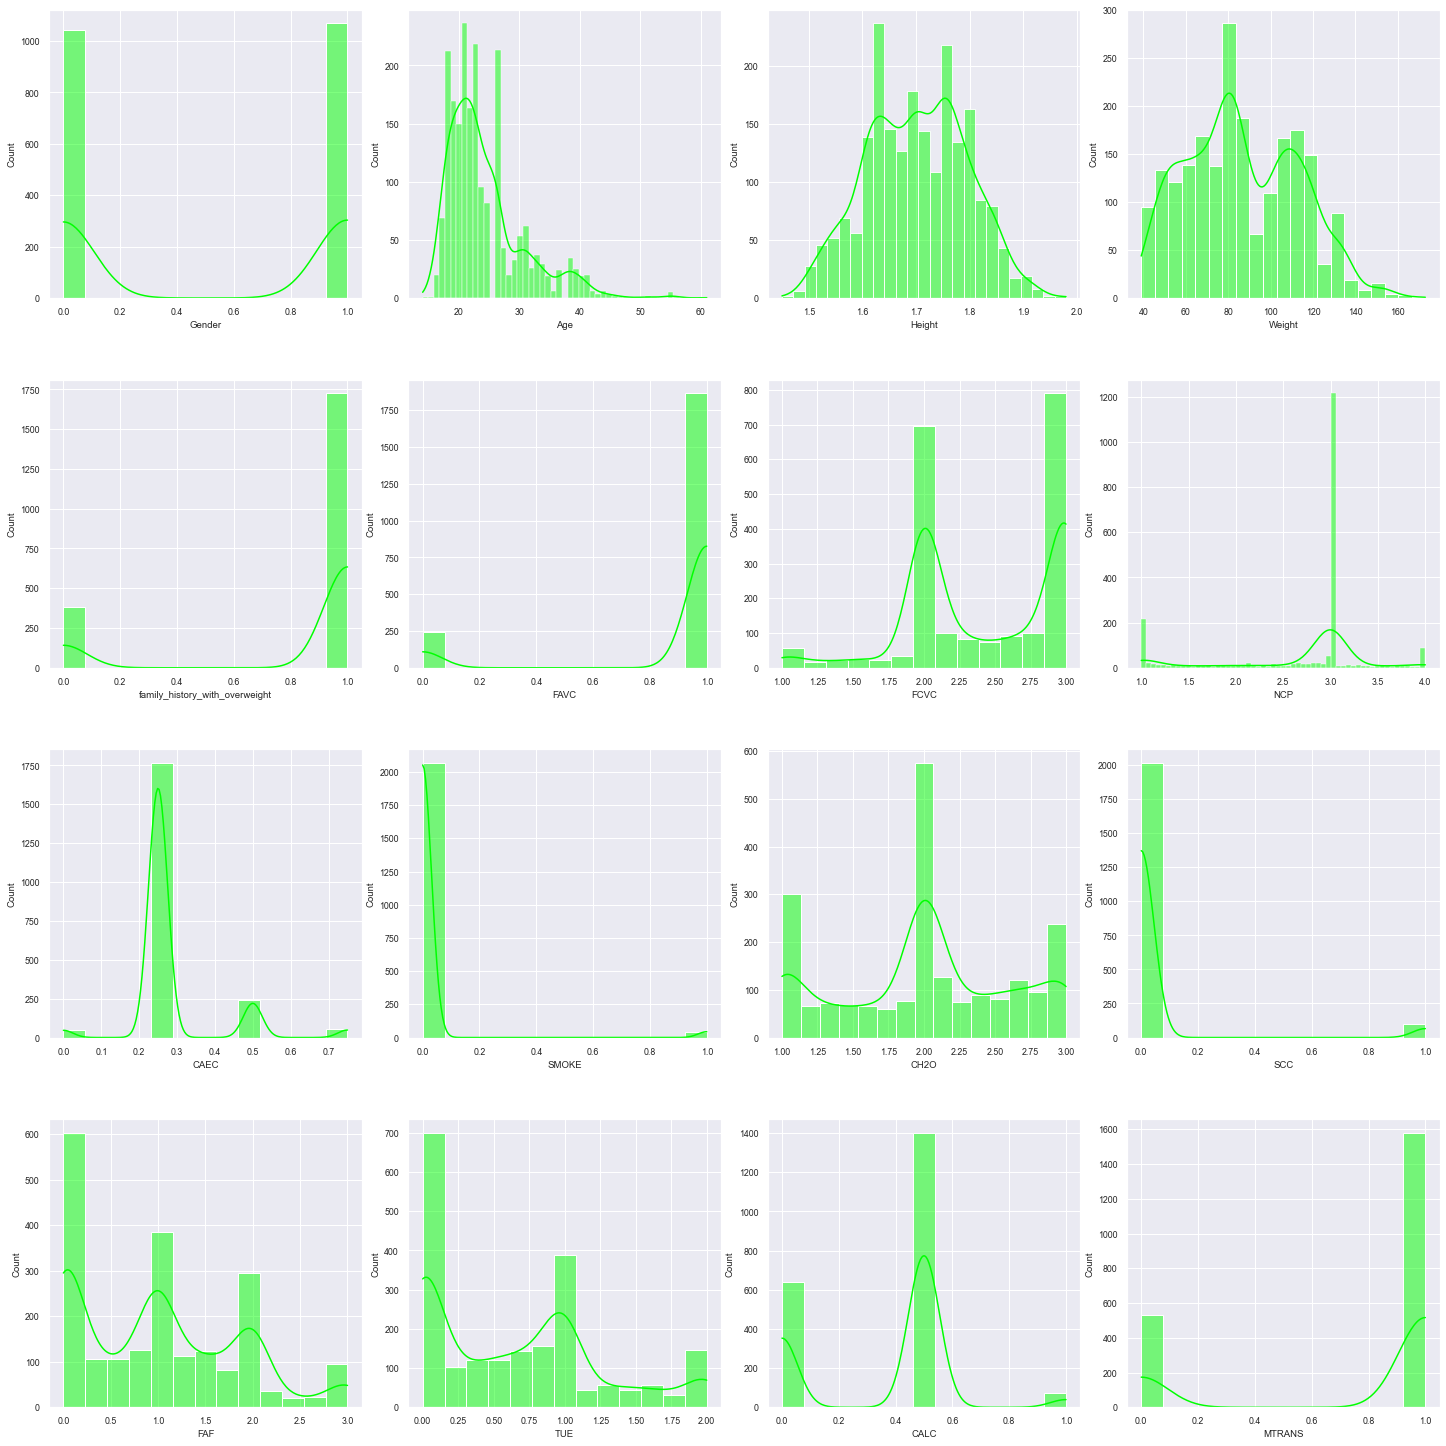

In [28]:
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
idx = 0
axs = axs.flatten()
for k, v in df.items():  
    if df[k].dtype != 'object':
        sns.histplot(x = k, data = df, ax = axs[idx],color="lime" ,kde =True)
        idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

## Creating new characteristics according to the purpose of mining:


Following the study definition, I have added a new variable that will be the BMI calculation as its definition in the study. In my humble opinion this value will be able to well predict the target category
The distribution of the BMI by width can give a bit of an idea of the distribution of the data in the database.


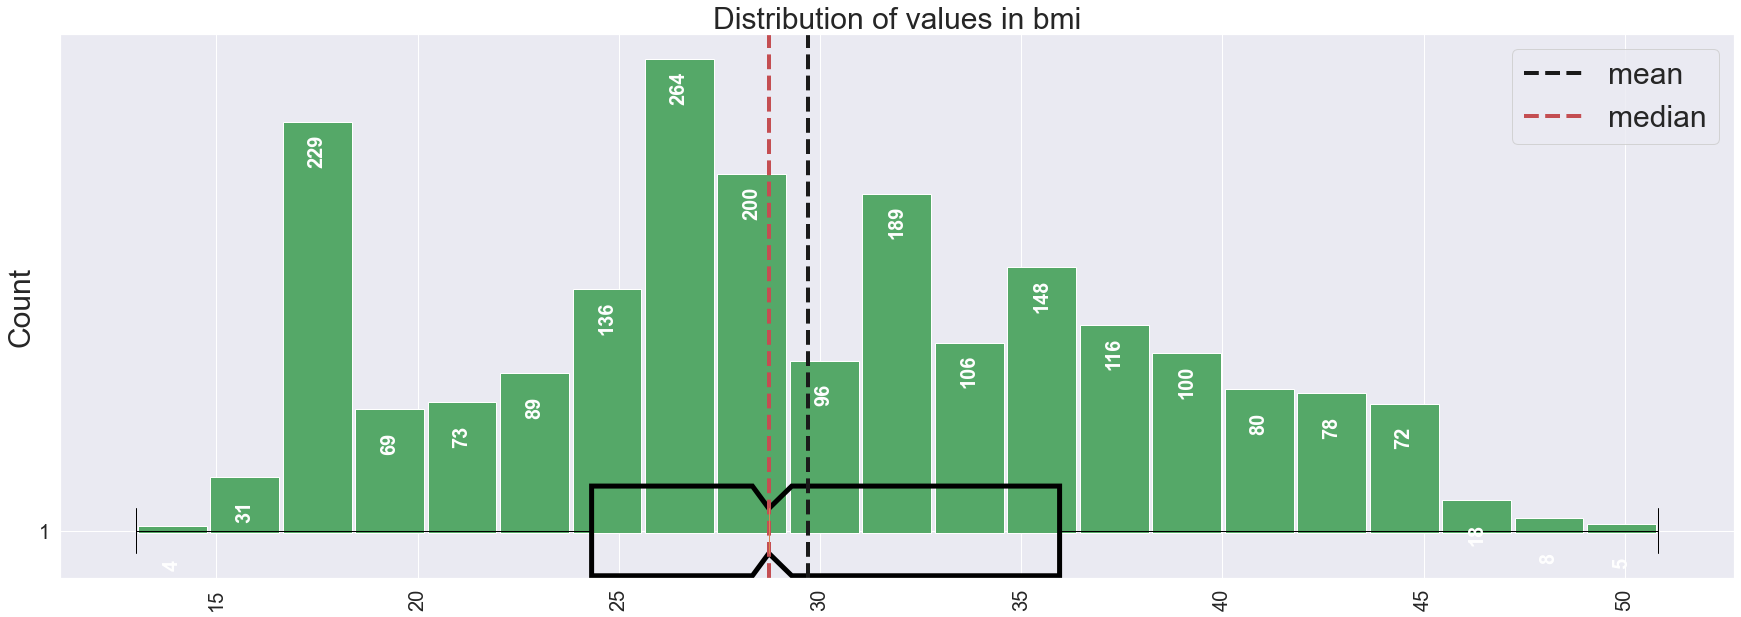

In [29]:

df['bmi']=np.divide(df['Weight'],np.power(df['Height'],2))
df['bmi']=np.around(df['bmi'],decimals=2)
countblock(df,"bmi")

# q 2.a
Choose two methods for classifying the data. Explain the methods and explain your choice.

The methods for mining the selected information are the realization of a Cart decision tree and the realization of a random forest.

If it is right to choose as an algorithm for mining an algorithm that uses decision tree, then necessarily the use of a random forest that considers several decision trees are probably the best choice if in front of his eyes only the desire to get correct prediction. Relatively long time for the realization of the task is not an argument for its non-realization)
In addition, because among the algorithms of decision trees the cart algorithm has a built-in implementation in the sklearn package then the "simplicity" that will be realized is a significant part in choosing an algorithm to use the task we have to submit, since the method will be simple. And may affect the understanding of the task tester.

I did not use linear regression to solve the above problem because our prediction problem is a discrete prediction problem, while regression is relevant to continuous numeric data and in our information set most discrete values, in addition, we saw with the help of matching matches - pps As all) are not linear bonds (since they did not appear in the symmetric correlation matrix given above but did appear in pps).


The reason why the use of the id3 algorithm and the c4.5 algorithm was rejected is their inadequacy to predict continuous values, and the understanding that although the classification problem currently seems to be discrete behind the lone variable of obesity is a continuous variable that has been discretized, so because we do not know yet We would prefer to implement a model that would be able to transfer knowledge between the models so that the base model is a model with support for continuous forecasting.


# q 2.b
Describe the steps of the methods you have chosen in section a.

I first divided the data using train_test_split from the sklearn.model_selection library by a ratio of 30:70 according to the accepted method and according to what we saw we were given that the database is a representation database, and we can learn from it in general about the whole opposite population.

In [30]:
labels = df["NObeyesdad"]
features = df.drop("NObeyesdad", axis = 1)
features = features.astype("float")
df = pd.concat([labels, features], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
from collections import Counter
features_train, features_test, labels_train, labels_test = train_test_split(
                features, labels, 
                test_size = 0.3, stratify = labels,
                random_state = 0) # shuffle=True
feature_names = [k for k in features_train.keys()]
feature_names
Counter(labels_train)

Counter({'Obesity_Type_III': 227,
         'Overweight_Level_II': 203,
         'Obesity_Type_I': 245,
         'Insufficient_Weight': 190,
         'Overweight_Level_I': 203,
         'Normal_Weight': 201,
         'Obesity_Type_II': 208})

(from an internet search for the study I concluded that about 70 percent of the data on which the training is performed is synthetic data so after trial and error it was decided to divide the information in these percentages and thus avoid overfit as much as possible but also achieve good results. )

## CART Algorithm:



At each node of the tree, select the attribute that most effectively splits the classification group into the most detailed subgroups for the current or after classification.


The split criterion is according to the Guinean index


The feature with the highest normal information gain is selected to make the decision.


Back for the leaves formed for the tree above

## Random Forest Algorithm:


Builds a set of random decision trees on some of the attributes (defined by us).


Makes a decision based on the results obtained from the random decision trees created.


Repeat the process until it reaches the threshold conditions that set for it.
 



# q 2.C - D
For each method the results of the surgeries were reported.

## Cart algorithm:

I implemented the cart algorithm using GridSearchCV which comes with the sklearn library.
The results returned from GridSearchCV were that the best running parameters are:
{'criterion': 'entropy', 'splitter': 'best'}

The exact results of the model and of the wood were printed above.

The tree is also saved as an image in the file: cart_tree.png

The best parameters are {'criterion': 'gini', 'splitter': 'best'} with a score of 0.9676
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.99      0.99        82
      Normal_Weight       0.98      0.97      0.97        86
     Obesity_Type_I       1.00      0.98      0.99       106
    Obesity_Type_II       0.98      1.00      0.99        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.93      0.94      0.94        87
Overweight_Level_II       0.95      0.97      0.96        87

           accuracy                           0.98       634
          macro avg       0.98      0.98      0.98       634
       weighted avg       0.98      0.98      0.98       634



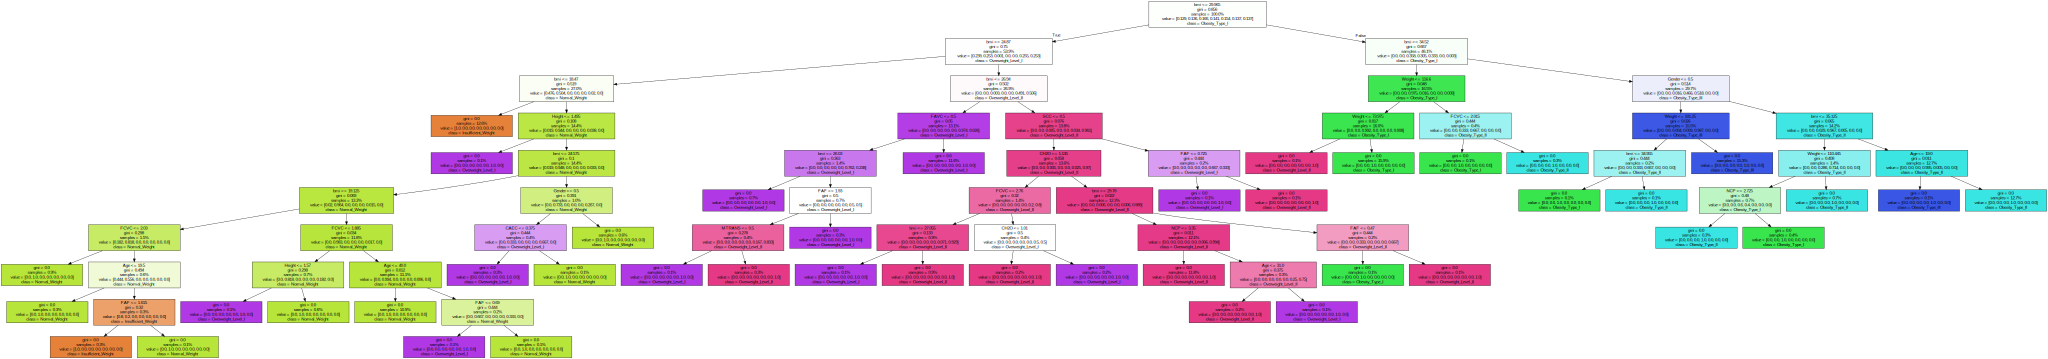

In [32]:
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV , StratifiedShuffleSplit
from sklearn.metrics import classification_report


def plot_Tree_graph(tree_model,features_train, labels_train,features):
    # DOT data
    data_print = tree.export_graphviz(tree_model, out_file=None, 
                                     proportion=True,
                                feature_names=features,
                                class_names = class_names,
                                filled=True)

    # Draw graph
    dot_data = graphviz.Source(data_print, format="png") 
    dot_data.render(filename='./imagesAndPDF/cart_tree.png',view=True,format='png')
    return dot_data
    
    
    
# cross-validation with 10 splits
cv = StratifiedShuffleSplit(n_splits=10, random_state = 0, test_size=0.3)

    
# CART decision tree
cart = tree.DecisionTreeClassifier(random_state = 0)

# parameters 

parameters = {
                "criterion": ["gini","entropy"],
                "splitter": ["best","random"],
                }

# grid search for parameters
grid_1 = GridSearchCV(estimator=cart, param_grid=parameters, cv=cv, n_jobs=1)
grid_1 = grid_1.fit(features_train, labels_train)
# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))

# prediction results
y_pred_cart = grid_1.predict(features_test)
print(classification_report(labels_test, y_pred_cart))
class_names =[ x for x in grid_1.classes_]
plot_Tree_graph(grid_1.best_estimator_,features_train,labels_train,feature_names)

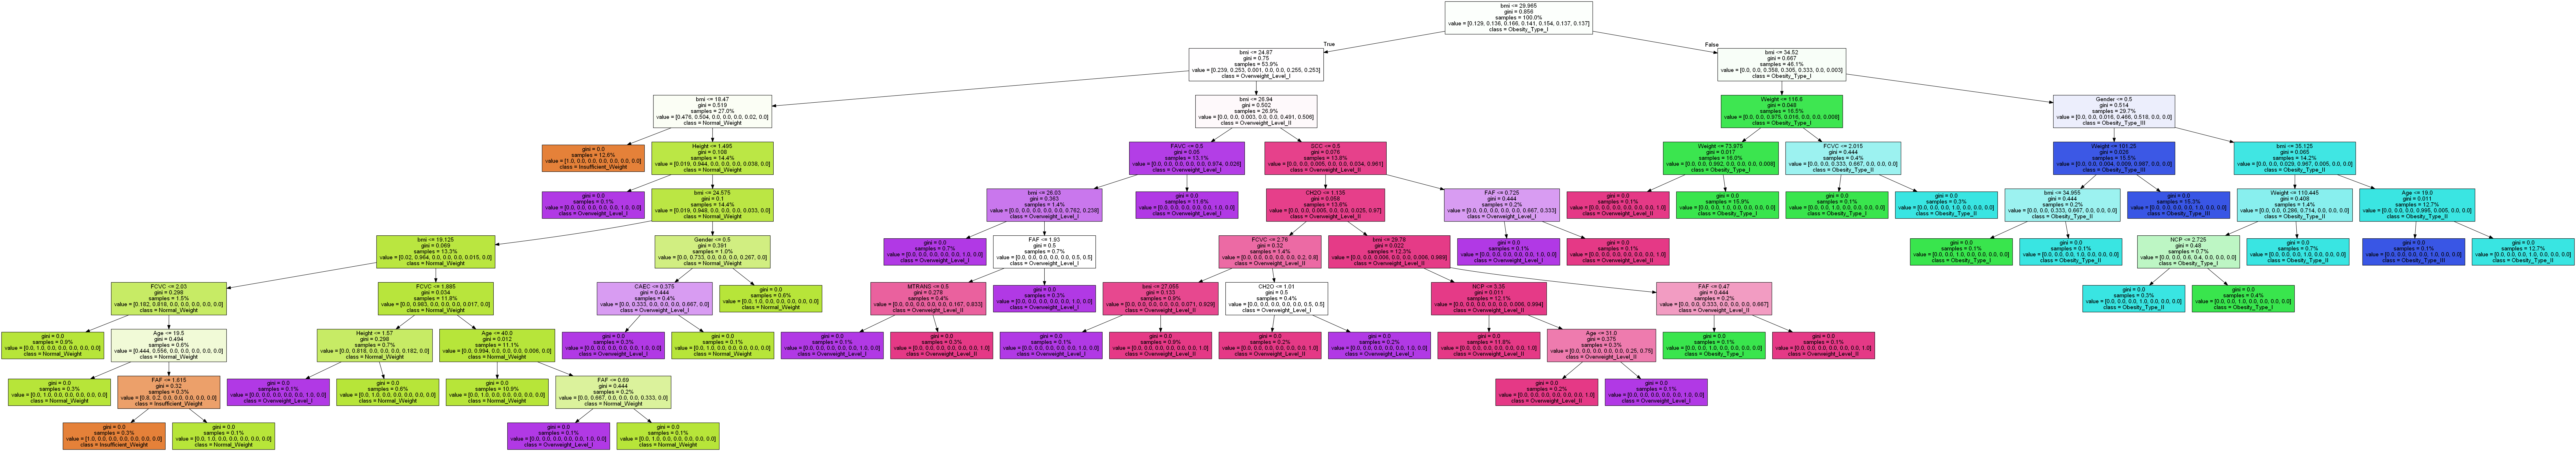

And the Confusion Matrix is:

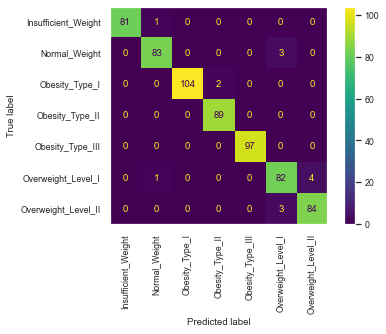

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(grid_1.best_estimator_,features_test, labels_test)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

## Random forest
For a random forest I limited the number of features in each decision to be a root of the total amount of features a tree has

And using the k-fold Cross Validation method (k = 10) the exact scores 
were:
 


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
parameters = {
                "bootstrap": ["True","False"],
                "max_features": ["sqrt"],
                "class_weight": [None, "balanced", "balanced_subsample"],
                "max_samples": [None, 0.3, 0.5, 0.7, 0.9],
                "n_estimators": [10,50,100 ]               
}

grid_6 = GridSearchCV(estimator=rf, param_grid=parameters,verbose = 2, cv=cv, n_jobs=-1)
grid_6.fit(features_train, labels_train)

print("The best parameters are %s with a score of %0.4f"
      % (grid_6.best_params_, grid_6.best_score_))

y_pred_rf = grid_6.predict(features_test)
print(classification_report(labels_test, y_pred_rf))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
The best parameters are {'bootstrap': 'True', 'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'max_samples': None, 'n_estimators': 100} with a score of 0.9865
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        82
      Normal_Weight       0.99      0.99      0.99        86
     Obesity_Type_I       0.99      0.99      0.99       106
    Obesity_Type_II       0.99      1.00      0.99        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.98      0.98      0.98        87
Overweight_Level_II       0.99      0.98      0.98        87

           accuracy                           0.99       634
          macro avg       0.99      0.99      0.99       634
       weighted avg       0.99      0.99      0.99       634



And the Confusion Matrix is:

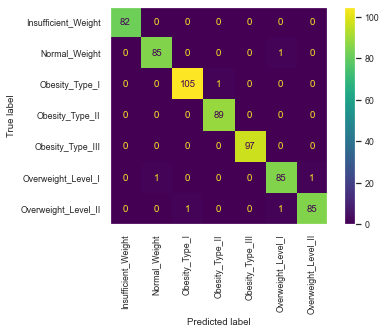

In [35]:
ConfusionMatrixDisplay.from_predictions(labels_test, y_pred_rf)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

Because random hair is made up of many trees and its analysis is not shown as a tree, I used the feature_importances feature from sklearn

In [36]:
feature_imp = pd.Series(grid_6.best_estimator_.feature_importances_, index = [k for k in features_train.keys()]).sort_values(ascending = False)
feature_imp

bmi                               0.424562
Weight                            0.202942
FCVC                              0.059444
Height                            0.048826
Age                               0.047938
Gender                            0.040836
NCP                               0.031307
TUE                               0.024469
family_history_with_overweight    0.022506
FAF                               0.020975
CAEC                              0.019962
CH2O                              0.018562
CALC                              0.014488
FAVC                              0.010310
MTRANS                            0.007023
SCC                               0.004705
SMOKE                             0.001143
dtype: float64

The thing that most affects the classification of a person with overweight / underweight is the BMI followed by the weight.
It is interesting to find that the frequency of eating vegetables has a greater effect on a person being classified into a particular group than a person’s height.

And as mentioned it seems clear that adding the BMI feature contributed a lot to the model.


# q 2.E

Comparatively analyze the results and draw conclusions including suggestions for improvements.

We will first start by comparing the accuracy between the 2 models used.

 It is obtained that in the tenth percent there is an advantage to a random forest when according to cart we will reach 98 percent success and according to a random forest we will reach accuracy with 99 percent success.


Secondly, because as told in the article going with the database, that part of the purpose of this study is to prevent obesity / underweight in the test population, then we would prefer a strict diagnosis over a stick (it is better for a person to be on a diet than not to be aware). Therefore, the most relevant measure is recall (Sensitivity), which shows how many times our model was right and predicted a satisfactory answer of true positive rate because it is a multi-class classification. The classification was performed according to the following image (taken from stack overflow -): 




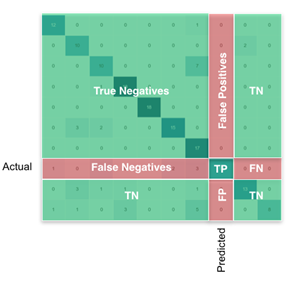

And thus, also by this measure we will prefer the random forest over the cart.

Contrary to the first two reasons, it is important to remember that not comparing this result is everything because a random forest is difficult to explain and also the computational resource it uses is greater and therefore not necessarily less than one tenth of a percent justifies the computational investment, and certainly if based on this project Eating wisely then there is a preference for the tree according to the cart which is easy to explain.


In summary each of the choices has something to rely on and the choice of one of them depends on many variables depending on the mining purposes
